In [661]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import os
path=os.getcwd()
#path=("C:/Users/billb/OneDrive - Kansas State University/allor/Data/Totals/")
path=("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/Data/Totals/")


In [662]:
#load pickle data
df_final=pd.read_pickle(path+"final_data.pkl")

To covert value added in national prices to us dollars for comparision, we need to get the purchasing power parity exchange rate. The penn world table has the market exchange rate (xr). The data also contains the price level of GDP compared to the US (pl_gdpo) in 2017 USD . I use that to compute the PPP- adjusted exchange rate as follows:

$xr_{pp}=\frac{xr}{pl_{gdpo}}$. 


I then use that to convert the value added to USD as follows:

$$




To covert value added in national prices to us dollars for comparision, we need to get the purchasing power parity exchange rate. The penn world table has the market exchange rate (xr). The data also contains the price level of GDP compared to the US (pl_gdpo) in 2017 USD . I use that to compute the PPP- adjusted exchange rate as follows:

$xr_{pp}=\frac{xr}{pl_{gdpo}}$ . 

I then use that to convert the value added to USD as follows:

$va_{us}=\frac{va}{xr_{pp}}$



In [663]:
df_final['xr_pp']=df_final['xr']/df_final['pl_gdpo']
list1=['AGR', 'MIN','MAN','UTI','CON','TRS','TRA','FIN','OTH','TOT']
for i in list1:
    df_final[i+'vaus']=df_final[i+'va']/df_final['xr_pp']
#compute labor productivity  in PPP terms
for i in list1:
    df_final[i+'lpus']=df_final[i+'vaus']/df_final[i+'emp']

for i in list1:
    df_final[i+'empshare']=df_final[i+'emp']/df_final['TOTemp']

for i in list1:
    df_final[i+'vashare']=df_final[i+'vareal']/df_final['TOTvareal']

In [664]:
df_final['Good_0empshare']=df_final['MINempshare']+df_final['MANempshare']+df_final['UTIempshare']+df_final['CONempshare']+df_final['TRSempshare']+df_final['TRAempshare']+df_final['FINempshare']
df_final['Good_0vashare']=df_final['MINvashare']+df_final['MANvashare']+df_final['UTIvashare']+df_final['CONvashare']+df_final['TRSvashare']+df_final['TRAvashare']+df_final['FINvashare']
df_final['Good0_lp']=df_final['MINlpreal']+df_final['MANlpreal']+df_final['UTIlpreal']+df_final['CONlpreal']+df_final['TRSlpreal']+df_final['TRAlpreal']+df_final['FINlpreal']
df_final['Good0_lppp']=df_final['MINlppp']+df_final['MANlppp']+df_final['UTIlppp']+df_final['CONlppp']+df_final['TRSlppp']+df_final['TRAlppp']+df_final['FINlppp']

In [665]:
df_final['Good_1empshare']=df_final['AGRempshare']
df_final['Good_2empshare']=df_final['OTHempshare']
df_final['Good1_lp']=df_final['AGRlpreal']
df_final['Good2_lp']=df_final['OTHlpreal']
df_final['Good1_lppp']=df_final['AGRlppp']
df_final['Good2_lppp']=df_final['OTHlppp']

df_final['Good_1vashare']=df_final['AGRvashare']
df_final['Good_2vashare']=df_final['OTHvashare']

In [666]:
df_final['Good0_lpus']=df_final['MINlpus']+df_final['MANlpus']+df_final['UTIlpus']+df_final['CONlpus']+df_final['TRSlpus']+df_final['TRAlpus']+df_final['FINlpus']
df_final['Good1_lpus']=df_final['AGRlpus']
df_final['Good2_lpus']=df_final['OTHlpus']

In [667]:
#compute GDP per capita
df_final['gdp_cap']=df_final['rgdpe']/df_final['pop']
df_final['gdp_cap_gr']=df_final.groupby('country')['gdp_cap'].pct_change()
df_final['log_gdp_cap']=np.log(df_final['gdp_cap'])
df_final['pop_gr']=df_final.groupby('country')['pop'].pct_change()
#lag the log of gdp_per capita
df_final['log_gdp_cap_lag']=df_final.groupby('country')['log_gdp_cap'].shift(1)
df_final['gdp_cap_lag']=df_final.groupby('country')['gdp_cap'].shift(1)

In [668]:
#take log of the labor productivity variables
df_final['log_Good1_lpus']=np.log(df_final['Good1_lpus']).copy()
df_final['log_Good2_lpus']=np.log(df_final['Good2_lpus']).copy()
df_final['log_Good0_lpus']=np.log(df_final['Good0_lpus']).copy()

/Users/preciousallor/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [669]:
def compute_growth_rates_and_differences(df):
    # Filter the DataFrame to only include rows where the year is a multiple of 5
    df = df[df['year'] % 5 == 0]
    #compute the logs of the labor productivity variables
    df['log_Good1_lpus']=np.log(df['Good1_lpus']).copy()
    df['log_Good2_lpus']=np.log(df['Good2_lpus']).copy()
    df['log_Good0_lpus']=np.log(df['Good0_lpus']).copy()
    # Compute the growth rates of labor productivity
    df['Good0_lpus_gr'] = (df.groupby('country')['log_Good1_lpus'].diff())/5
    df['Good1_lpus_gr'] = (df.groupby('country')['log_Good2_lpus'].diff())/5
    df['Good2_lpus_gr'] = (df.groupby('country')['log_Good0_lpus'].diff())/5

    # Compute the differences in growth rates of labor productivity
    df['ag_mn_diff'] = df['Good1_lpus_gr'] - df['Good0_lpus_gr']
    df['ser_mn_diff'] = df['Good2_lpus_gr'] - df['Good0_lpus_gr']

    return df

In [670]:
df2=compute_growth_rates_and_differences(df_final)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2618028028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Good1_lpus']=np.log(df['Good1_lpus']).copy()
/Users/preciousallor/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2618028028.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_Go

In [671]:
import numpy as np
from scipy import stats

def plot_scatter5(df, group_column, column_titles, x_labels, y_columns, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Change to 1 row and 2 columns

    for j in range(2):  # Only loop over 2 subplots
        column1 = 'log_gdp_cap'
        column2 = y_columns[j]  # Use the column names from the y_columns list

        x_label = x_labels[j]
        y_label = y_labels[j]

        groups = df.groupby(group_column)

        for name, group in groups:
            axs[j].scatter(group[column1], group[column2], alpha=0.5, 
                           edgecolors=group_colors[name], facecolors='none', marker=group_markers[name],
                           label=name)

        # Fit a line to all the data and plot it
        all_data = df[[column1, column2]].dropna()
        if len(all_data) > 1:
            m, b = np.polyfit(all_data[column1], all_data[column2], 1)
            axs[j].plot(all_data[column1], m*all_data[column1] + b, color='black')

            # Calculate the coefficient, t-statistic, and p-value
            slope, intercept, r_value, p_value, std_err = stats.linregress(all_data[column1], all_data[column2])
            t_stat = slope/std_err

            # Add a textbox with the coefficient, t-statistic, and p-value
            textstr = f'Coefficient: {slope:.2f}\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.2f}'
            axs[j].text(0.05, 0.95, textstr, transform=axs[j].transAxes, fontsize=10,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        axs[j].set_xlabel(x_label, fontsize=12)
        axs[j].set_ylabel(y_label, fontsize=12)
        axs[j].grid(True)

        # Set column title
        fig.text(0.30*(j+0.6), 0.91, column_titles[j], ha='center', va='center', fontsize=16,weight='bold')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in group_colors.keys()]  # Use the new name for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.008))  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

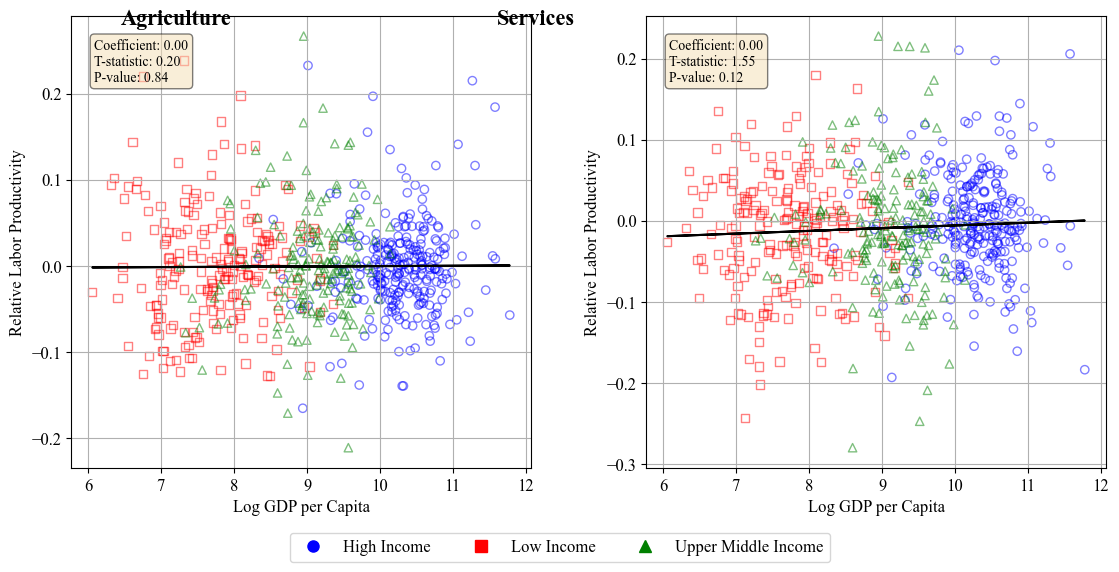

In [672]:
plot_scatter5(df2, 'income_group',
              ['Agriculture', 'Services'],
              ['Log GDP per Capita', 'Log GDP per Capita'],
              ['ag_mn_diff', 'ser_mn_diff'],
              ['Relative Labor Productivity','Relative Labor Productivity'] ,
              {'HIC': 'High Income', 'LIC': 'Low Income', 'UMI': 'Upper Middle Income'})

#### Some initial plots


In [673]:

def plot_shares(df, variables, labels, titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    # Filter data
    df = df[df['year'] >= 1975]

    # Define the color map, line style map, and transparency map (alpha values)
    color_map = {'HIC': 'darkblue', 'LIC': 'red', 'UMI': 'green'}
    line_style_map = {'HIC': '-', 'LIC': ':', 'UMI': '--'}  # Keep all lines solid for this approach
    alpha_map = {'HIC': 0.3, 'LIC': 0.6, 'UMI': 1}  # Filled (1.0), Not Filled (0.0 - hollow), Shaded (0.2)
    line_width_map = {'HIC': 1, 'LIC': 1, 'UMI': 1}

    fig, ax = plt.subplots(3, 2, figsize=(10, 15))
    fig.subplots_adjust(top=0.6, bottom=0.2, hspace=0.3)  # Adjust space for titles

    for i, (variable, (x_label, y_label, mean_y_label), title) in enumerate(zip(variables, labels, titles)):
        # Add a title for the row
        fig.text(0.5, 1 - (i * 0.33), title, ha='center', va='center', fontsize=16,weight='bold')

        ax[i][0].set_title('Panel A', fontsize=12)
        ax[i][1].set_title('Panel B', fontsize=12)

        # Plot the employment shares for each country (Panel A)
        pivot_table = df.pivot_table(values=variable, index='year', columns='country')
        for country in pivot_table.columns:
            income_group = df.loc[df['country'] == country, 'income_group'].iloc[0]
            ax[i][0].plot(
                pivot_table.index, pivot_table[country], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]  # Apply the transparency
            )

        # Plot the mean employment shares for each income group (Panel B)
        grouped_data = df.groupby(['year', 'income_group'])[variable].mean().unstack()
        for income_group in grouped_data.columns:
            ax[i][1].plot(
                grouped_data.index, grouped_data[income_group], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]  # Apply transparency for shading effect
            )

        # Label axis
        ax[i][0].set_xlabel(x_label, fontsize=12)
        ax[i][0].set_ylabel(y_label, fontsize=12)
        ax[i][1].set_xlabel(x_label, fontsize=12)
        ax[i][1].set_ylabel(mean_y_label, fontsize=12)

    # Create custom lines for the legend
    HIC_line = mlines.Line2D([], [], color='darkblue', linestyle='-', linewidth=3, alpha=0.5, label='High Income')
    LIC_line = mlines.Line2D([], [], color='red', linestyle=':', linewidth=2, alpha=0.8, label='Low Income')
    UMI_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=2, alpha=1, label='Upper Middle Income ')

    # Add the legend to the figure at the bottom
    fig.legend(handles=[HIC_line, LIC_line, UMI_line], loc='lower center', ncol=3, fontsize=12,bbox_to_anchor=(0.5, -0.03))

    plt.tight_layout()  # Leave space for the legend and titles
    #save plot in new folder
    plt.savefig("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/dynare/Pictures/productivity.png")
    plt.show()


In [674]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_shares(df, variables, labels, titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    # Filter data
    df = df[df['year'] >= 1975]
    #creare 5-year intervals
    df = df[df['year'] % 5 == 0]

    # Define the color map, line style map, and transparency map (alpha values)
    color_map = {'HIC': 'darkblue', 'LIC': 'red', 'UMI': 'green'}
    line_style_map = {'HIC': '-', 'LIC': ':', 'UMI': '--'}  # Keep all lines solid for this approach
    alpha_map = {'HIC': 0.3, 'LIC': 0.6, 'UMI': 1}  # Filled (1.0), Not Filled (0.0 - hollow), Shaded (0.2)
    line_width_map = {'HIC': 1, 'LIC': 1, 'UMI': 1}

    fig, ax = plt.subplots(3, 2, figsize=(10, 15))
    fig.subplots_adjust(top=0.6, bottom=0.2, hspace=0.3)  # Adjust space for titles

    # Define the panel letters
    panel_letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for i, (variable, (x_label, y_label, mean_y_label), title) in enumerate(zip(variables, labels, titles)):
        # Add a title for the row
        fig.text(0.5, 1 - (i * 0.33), title, ha='center', va='center', fontsize=16,weight='bold')

        ax[i][0].set_title('Panel ' + panel_letters[2*i], fontsize=12)
        ax[i][1].set_title('Panel ' + panel_letters[2*i + 1], fontsize=12)

        # ... rest of the code ...
        # Plot the employment shares for each country (Panel A)
        pivot_table = df.pivot_table(values=variable, index='year', columns='country')
        for country in pivot_table.columns:
            income_group = df.loc[df['country'] == country, 'income_group'].iloc[0]
            ax[i][0].plot(
                pivot_table.index, pivot_table[country], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]  # Apply the transparency
            )

        # Plot the mean employment shares for each income group (Panel B)
        grouped_data = df.groupby(['year', 'income_group'])[variable].mean().unstack()
        for income_group in grouped_data.columns:
            ax[i][1].plot(
                grouped_data.index, grouped_data[income_group], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]  # Apply transparency for shading effect
            )

        # Label axis
        ax[i][0].set_xlabel(x_label, fontsize=12)
        ax[i][0].set_ylabel(y_label, fontsize=12)
        ax[i][1].set_xlabel(x_label, fontsize=12)
        ax[i][1].set_ylabel(mean_y_label, fontsize=12)

    # Create custom lines for the legend
    HIC_line = mlines.Line2D([], [], color='darkblue', linestyle='-', linewidth=3, alpha=0.5, label='High Income')
    LIC_line = mlines.Line2D([], [], color='red', linestyle=':', linewidth=2, alpha=0.8, label='Low Income')
    UMI_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=2, alpha=1, label='Upper Middle Income ')

    # Add the legend to the figure at the bottom
    fig.legend(handles=[HIC_line, LIC_line, UMI_line], loc='lower center', ncol=3, fontsize=12,bbox_to_anchor=(0.5, -0.03))

    plt.tight_layout()  # Leave space for the legend and titles
    #save plot in new folder
    plt.savefig("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/dynare/Pictures/productivity.png")
    plt.show()

In [675]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_shares(df, variables, labels, titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    # Filter data
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]

    # Define the color map, line style map, marker map, and transparency map (alpha values)
    color_map = {'HIC': 'darkblue', 'LIC': 'red', 'UMI': 'green'}
    line_style_map = {'HIC': '-', 'LIC': ':', 'UMI': '--'}
    marker_map = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}  # Circle, Square, Diamond markers
    alpha_map = {'HIC': 0.3, 'LIC': 0.6, 'UMI': 1}
    line_width_map = {'HIC': 1.5, 'LIC': 2.5, 'UMI': 1}

    fig, ax = plt.subplots(3, 2, figsize=(10, 15))
    fig.subplots_adjust(top=0.6, bottom=0.2, hspace=0.3)  # Adjust space for titles

    # Define the panel letters
    panel_letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for i, (variable, (x_label, y_label, mean_y_label), title) in enumerate(zip(variables, labels, titles)):
        # Add a title for the row
        fig.text(0.5, 1 - (i * 0.33), title, ha='center', va='center', fontsize=16, weight='bold')

        ax[i][0].set_title('Panel ' + panel_letters[2*i], fontsize=12)
        ax[i][1].set_title('Panel ' + panel_letters[2*i + 1], fontsize=12)

        # Plot the employment shares for each country (Panel A)
        pivot_table = df.pivot_table(values=variable, index='year', columns='country')
        for country in pivot_table.columns:
            income_group = df.loc[df['country'] == country, 'income_group'].iloc[0]
            ax[i][0].plot(
                pivot_table.index, pivot_table[country], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        # Plot the mean employment shares for each income group (Panel B)
        grouped_data = df.groupby(['year', 'income_group'])[variable].mean().unstack()
        for income_group in grouped_data.columns:
            ax[i][1].plot(
                grouped_data.index, grouped_data[income_group], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                marker=marker_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        # Label axis
        ax[i][0].set_xlabel(x_label, fontsize=12)
        ax[i][0].set_ylabel(y_label, fontsize=12)
        ax[i][1].set_xlabel(x_label, fontsize=12)
        ax[i][1].set_ylabel(mean_y_label, fontsize=12)

    # Create custom lines for the legend
    HIC_line = mlines.Line2D([], [], color='darkblue', linestyle='-', marker='o', linewidth=3, alpha=0.5, label='High Income')
    UMI_line = mlines.Line2D([], [], color='green', linestyle='--', marker='^', linewidth=2, alpha=1, label='Middle Income')
    LIC_line = mlines.Line2D([], [], color='red', linestyle=':', marker='s', linewidth=2, alpha=0.8, label='Low Income')


    # Add the legend to the figure at the bottom
    fig.legend(handles=[LIC_line,UMI_line,HIC_line], loc='lower center', ncol=3, fontsize=12, bbox_to_anchor=(0.5, -0.03))

    plt.tight_layout()  # Leave space for the legend and titles
    # Save plot in new folder
    plt.savefig("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/dynare/Pictures/productivity.png")
    plt.show()

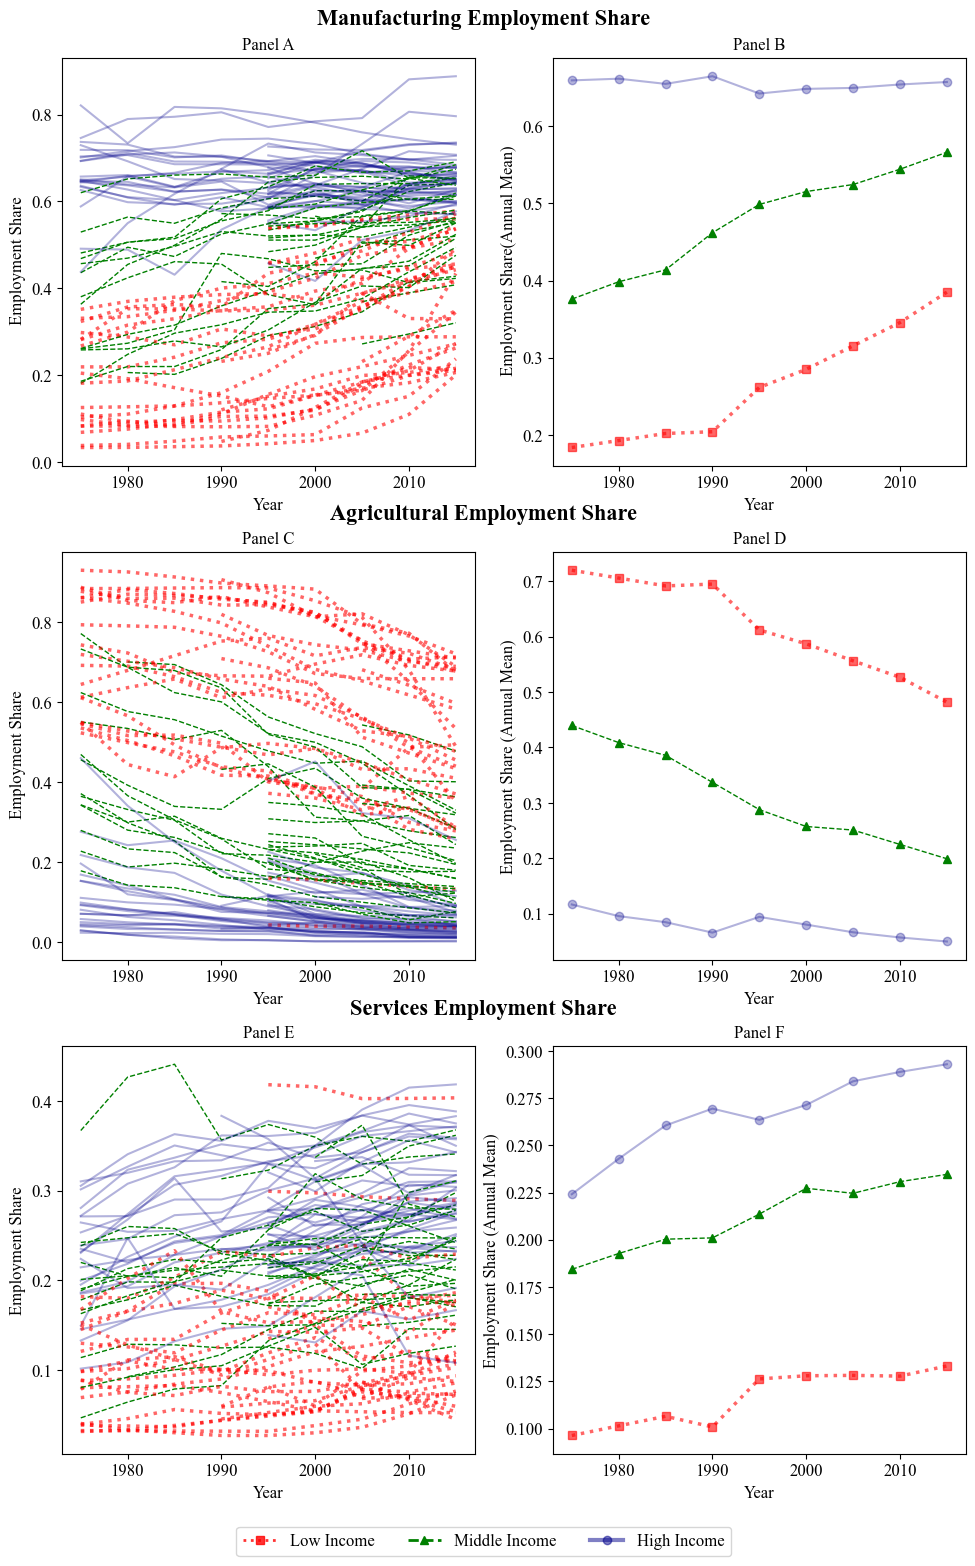

In [676]:
plot_shares(df_final, ['Good_0empshare','Good_1empshare', 'Good_2empshare'], 
            [('Year', ' Employment Share', ' Employment Share(Annual Mean)'), ('Year', ' Employment Share', 'Employment Share (Annual Mean)'), ('Year', 'Employment Share', 'Employment Share (Annual Mean)')], 
            ['Manufacturing Employment Share','Agricultural Employment Share', 'Services Employment Share' ])

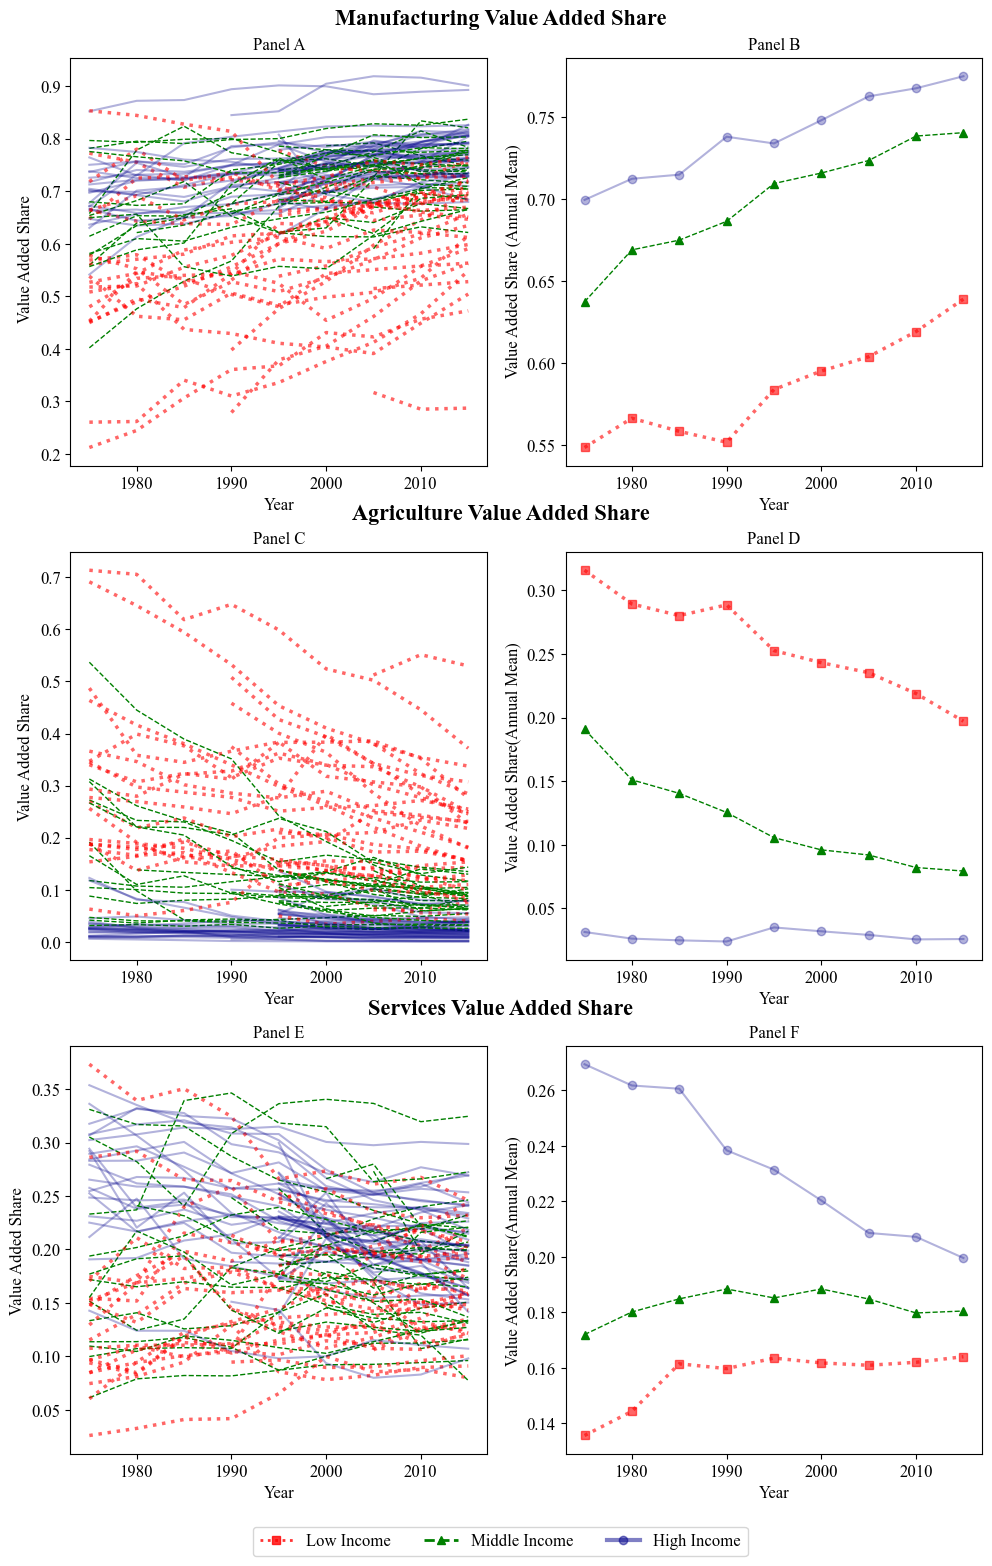

In [677]:
plot_shares(df_final, ['Good_0vashare','Good_1vashare', 'Good_2vashare'], 
            [('Year', '  Value Added Share', ' Value Added Share (Annual Mean)'), ('Year', 'Value Added Share', 'Value Added Share(Annual Mean)'), ('Year',  'Value Added Share', 'Value Added Share(Annual Mean)')],
              ['Manufacturing Value Added Share', 'Agriculture Value Added Share', 'Services Value Added Share'])

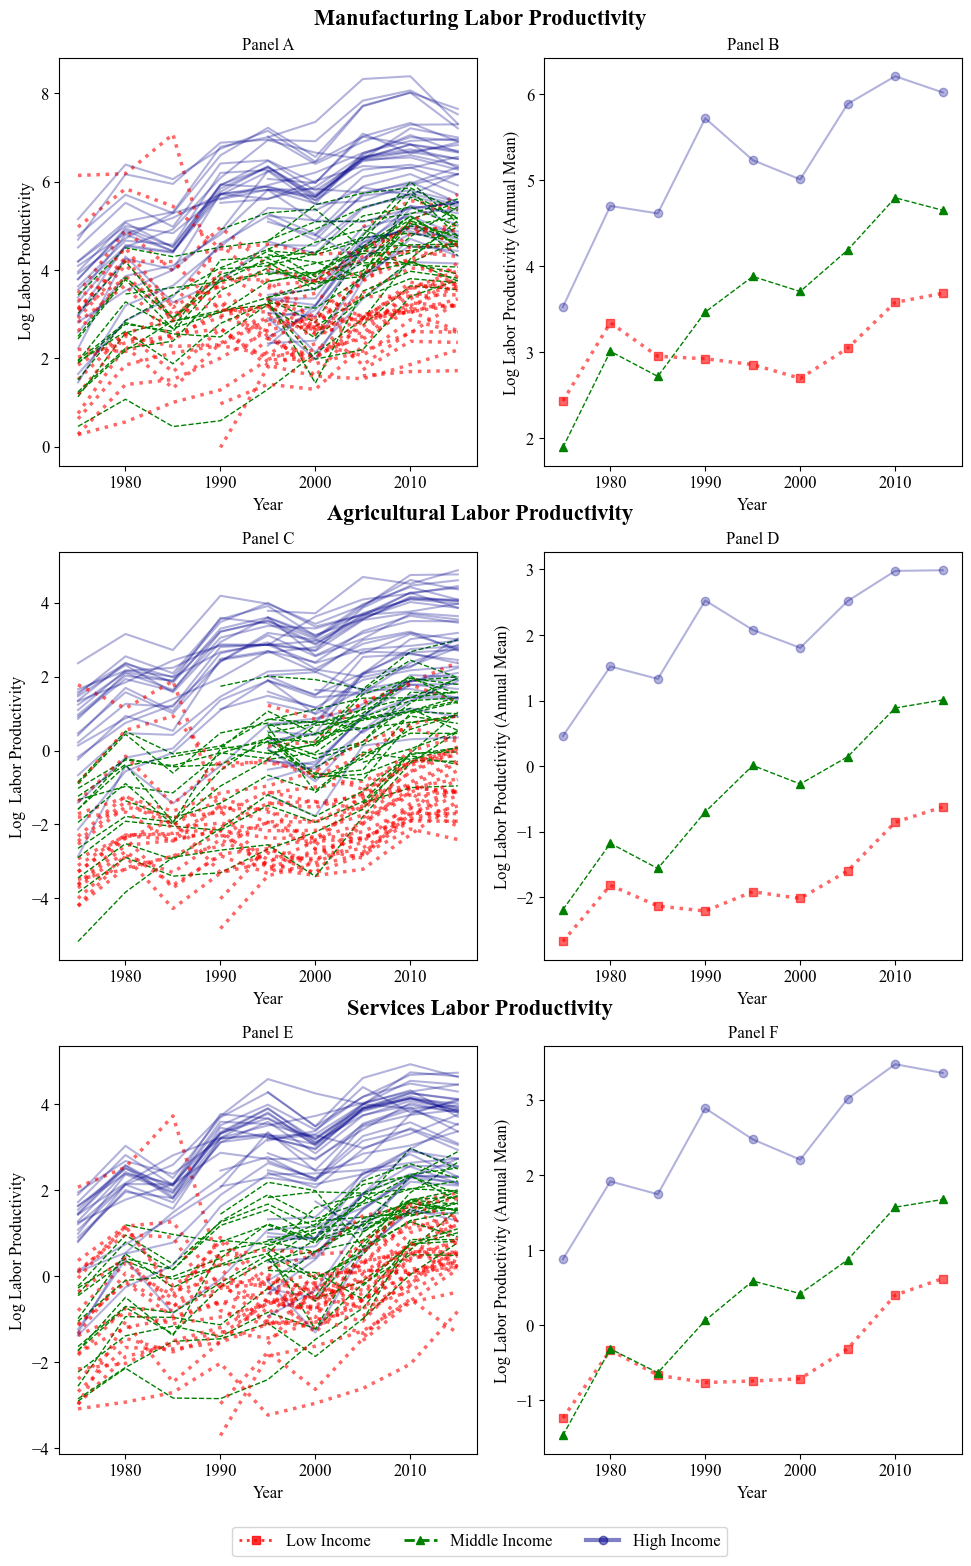

In [678]:
plot_shares(df_final, ['log_Good0_lpus','log_Good1_lpus', 'log_Good2_lpus'],
             [('Year', ' Log Labor Productivity', 'Log Labor Productivity (Annual Mean)'), ('Year', 'Log  Labor Productivity', 'Log Labor Productivity (Annual Mean)'), ('Year', 'Log Labor Productivity', 'Log Labor Productivity (Annual Mean)')], 
             ['Manufacturing Labor Productivity', 'Agricultural Labor Productivity', 'Services Labor Productivity'])

In [679]:
def plot_shares2(df, variables, labels, titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]

    color_map = {'HIC': 'darkblue', 'LIC': 'red', 'UMI': 'green'}
    line_style_map = {'HIC': '-', 'LIC': ':', 'UMI': '--'}
    alpha_map = {'HIC': 0.3, 'LIC': 0.6, 'UMI': 1}
    line_width_map = {'HIC': 1, 'LIC': 1, 'UMI': 1}

    fig, ax = plt.subplots(4, 2, figsize=(10, 20))  # Change to 4 rows and 2 columns
    fig.subplots_adjust(top=0.6, bottom=0.2, hspace=0.3)

    panel_letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

    for i, (variable, (x_label, y_label, mean_y_label), title) in enumerate(zip(variables, labels, titles)):
        fig.text(0.5, 1 - (i * 0.25), title, ha='center', va='center', fontsize=16,weight='bold')  # Adjust the title position

        ax[i//2][i%2].set_title('Panel ' + panel_letters[i], fontsize=14)

        pivot_table = df.pivot_table(values=variable, index='year', columns='country')
        for country in pivot_table.columns:
            income_group = df.loc[df['country'] == country, 'income_group'].iloc[0]
            ax[i//2][i%2].plot(
                pivot_table.index, pivot_table[country], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        grouped_data = df.groupby(['year', 'income_group'])[variable].mean().unstack()
        for income_group in grouped_data.columns:
            ax[i//2][i%2].plot(
                grouped_data.index, grouped_data[income_group], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        ax[i//2][i%2].set_xlabel(x_label, fontsize=12)
        ax[i//2][i%2].set_ylabel(y_label, fontsize=12)

    HIC_line = mlines.Line2D([], [], color='darkblue', linestyle='-', linewidth=3, alpha=0.5, label='High Income')
    LIC_line = mlines.Line2D([], [], color='red', linestyle=':', linewidth=2, alpha=0.8, label='Low Income')
    UMI_line = mlines.Line2D([], [], color='green', linestyle='--', linewidth=2, alpha=1, label='Upper Middle Income ')

    fig.legend(handles=[HIC_line, LIC_line, UMI_line], loc='lower center', ncol=3, fontsize=12,bbox_to_anchor=(0.5, -0.03))

    plt.tight_layout()
    plt.savefig("/Users/preciousallor/Library/CloudStorage/OneDrive-KansasStateUniversity/Documents - William Blankenau's files/allor/dynare/Pictures/productivity.png")
    plt.show()

In [680]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels,legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(3, 3, figsize=(18, 18))

    for i in range(3):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{i}empshare' if j == 0 else f'Good_{i}vashare' if j == 1 else f'log_Good{i}_lpus'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  color=group_colors[name], marker=group_markers[name],
                                  label=name)

            axs[i, j].set_title(title, fontsize=16)
            axs[i, j].set_xlabel(x_label, fontsize=16)
            axs[i, j].set_ylabel(y_label, fontsize=16)
            axs[i, j].grid(True)

        # Set column title
        fig.text(0.30*(i+0.6), 0.91, column_titles[i], ha='center', va='center', fontsize=16,weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = [ 'HIC','UMI', 'LIC']  # Specify the desired order
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.008))  # Adjust the bbox_to_anchor parameter

    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.008))  # Adjust the bbox_to_anchor parameter

plt.tight_layout(pad=3.0)  # Increase the padding
plt.show()

<Figure size 1000x800 with 0 Axes>

In [681]:
#compute ratio of labor productivity in agriculture to labor productivity in manufacturing
df_final['labormratio']=df_final['log_Good1_lpus']/df_final['log_Good0_lpus']
#compute ratio of labor productivity in services to labor productivity in manufacturing
df_final['laborsratio']=df_final['log_Good2_lpus']/df_final['log_Good0_lpus']

In [682]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(3, 3, figsize=(18, 18))

    for i in range(3):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{i}empshare' if j == 0 else f'Good_{i}vashare' if j == 1 else f'log_Good{i}_lpus'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            all_X = []
            all_y = []

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  facecolors='none' if name in ['HIC', 'LIC'] else group_colors[name], 
                                  edgecolors=group_colors[name], marker=group_markers[name],
                                  label=name)
                all_X.extend(group[column1].values)
                all_y.extend(group[column2].values)

            # Convert lists to numpy arrays
            all_X = np.array(all_X).reshape(-1, 1)
            all_y = np.array(all_y)

            # Fit both linear and polynomial regression models
            linear_model = LinearRegression()
            linear_model.fit(all_X, all_y)
            y_linear_fit = linear_model.predict(all_X)
            linear_r2 = r2_score(all_y, y_linear_fit)

            polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
            polynomial_model.fit(all_X, all_y)
            y_poly_fit = polynomial_model.predict(all_X)
            poly_r2 = r2_score(all_y, y_poly_fit)

            # Choose the model with the higher R-squared value
            if poly_r2 > linear_r2:
                best_model = polynomial_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)
            else:
                best_model = linear_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)

            axs[i, j].plot(X_fit, y_fit, color='black', linestyle='-', linewidth=2)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            axs[i, j].grid(True)
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers


        # Set column title
        fig.text(0.30*(i+0.6), 1, column_titles[i], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = ['HIC', 'UMI', 'LIC']  # Specify the desired order
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'income_group', column_titles, titles, x_labels, y_labels, legend_names)

In [683]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(2, 3, figsize=(24, 12))

    for i in range(2):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{j}empshare' if i == 0 else f'Good_{j}vashare'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            all_X = []
            all_y = []

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  facecolors='none' if name in ['HIC', 'LIC'] else group_colors[name], 
                                  edgecolors=group_colors[name], marker=group_markers[name],
                                  label=name)
                all_X.extend(group[column1].values)
                all_y.extend(group[column2].values)

            # Convert lists to numpy arrays
            all_X = np.array(all_X).reshape(-1, 1)
            all_y = np.array(all_y)

            # Fit both linear and polynomial regression models
            linear_model = LinearRegression()
            linear_model.fit(all_X, all_y)
            y_linear_fit = linear_model.predict(all_X)
            linear_r2 = r2_score(all_y, y_linear_fit)

            polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
            polynomial_model.fit(all_X, all_y)
            y_poly_fit = polynomial_model.predict(all_X)
            poly_r2 = r2_score(all_y, y_poly_fit)

            # Choose the model with the higher R-squared value
            if poly_r2 > linear_r2:
                best_model = polynomial_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)
            else:
                best_model = linear_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)

            axs[i, j].plot(X_fit, y_fit, color='black', linestyle='-', linewidth=2)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            axs[i, j].grid(True)
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers

    # Set column titles
    for j in range(3):
        fig.text(0.17 + 0.33 * j, 0.99, column_titles[j], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = ['HIC', 'UMI', 'LIC']  # Specify the desired order
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'income_group', column_titles, titles, x_labels, y_labels, legend_names)

In [684]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(2, 3, figsize=(24, 12))

    for i in range(2):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{j}empshare' if i == 0 else f'Good_{j}vashare'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  facecolors='none' if name in ['HIC', 'LIC'] else group_colors[name], 
                                  edgecolors=group_colors[name], marker=group_markers[name],
                                  label=name)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers

    # Set column titles
    for j in range(3):
        fig.text(0.17 + 0.33 * j, 0.99, column_titles[j], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = ['LIC', 'UMI','HIC' ]  # Specify the desired order
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'income_group', column_titles, titles, x_labels, y_labels, legend_names)

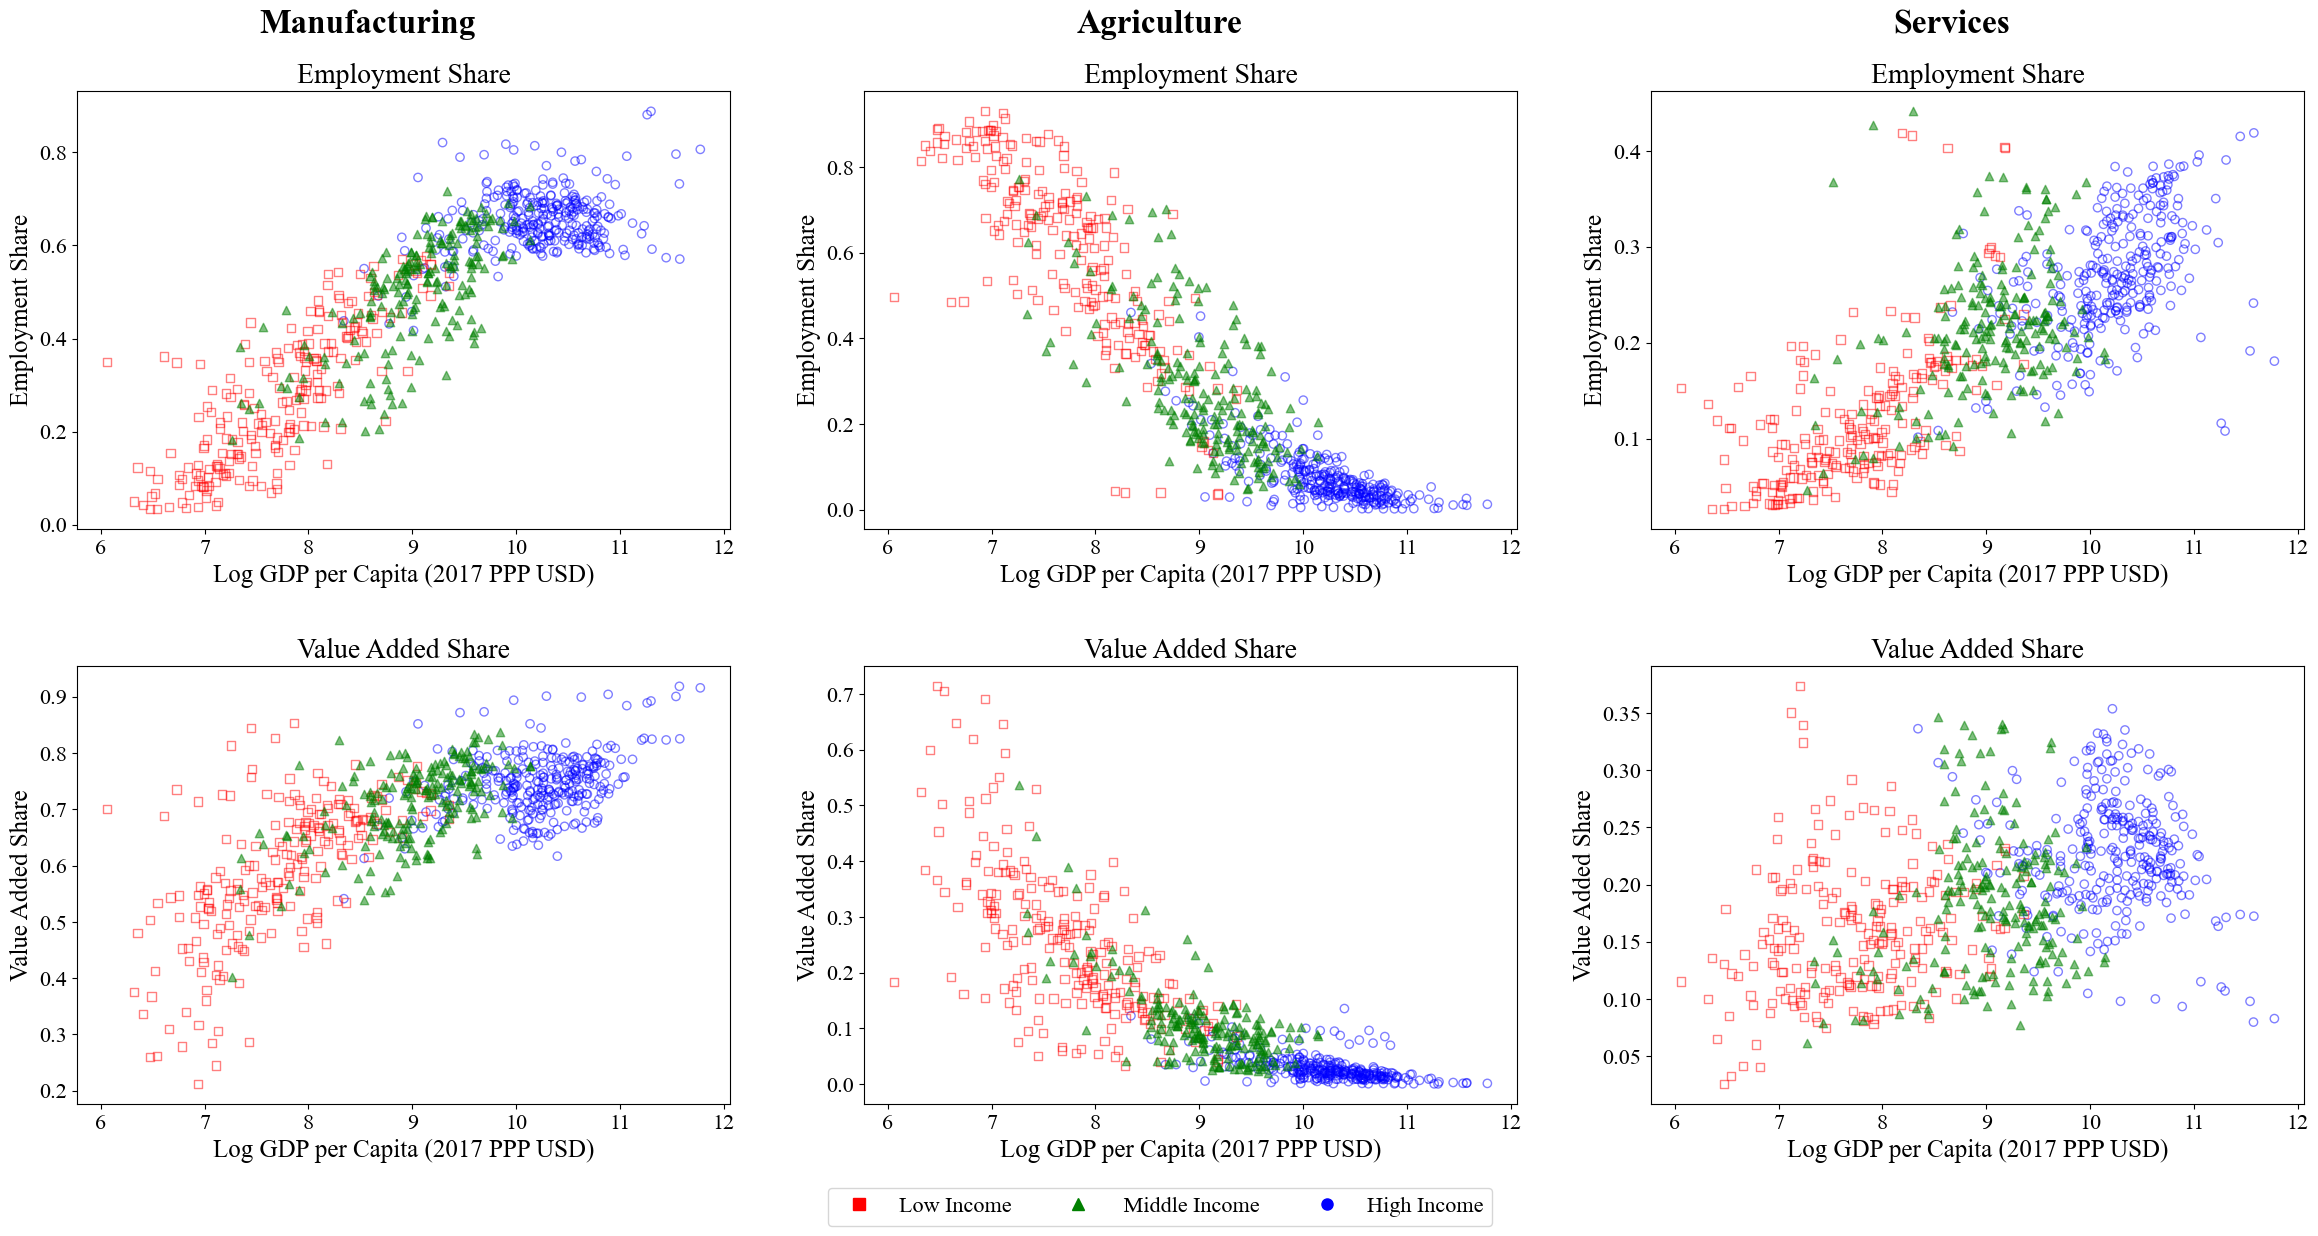

In [685]:
plot_scatter(
    df_final, 
    'income_group',
    ['Manufacturing', 'Agriculture', 'Services'],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    [['Log GDP per Capita (2017 PPP USD)', 'Log GDP per Capita (2017 PPP USD)', 'Log GDP per Capita (2017 PPP USD)'], 
     ['Log GDP per Capita (2017 PPP USD)', 'Log GDP per Capita (2017 PPP USD)', 'Log GDP per Capita (2017 PPP USD)']],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    {'HIC': 'High Income', 'LIC': 'Low Income', 'UMI': ' Middle Income'}
)

##HIC COUNTRIES

In [686]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Filter for only HIC countries
    df = df[df[group_column] == 'HIC']
    
    # Define the color and marker for HIC group
    group_colors = {'HIC': 'blue'}
    group_markers = {'HIC': 'o'}

    fig, axs = plt.subplots(2, 3, figsize=(24, 12))

    for i in range(2):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{j}empshare' if i == 0 else f'Good_{j}vashare'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            all_X = []
            all_y = []

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  facecolors='none' if name == 'HIC' else group_colors[name], 
                                  edgecolors=group_colors[name], marker=group_markers[name],
                                  label=name)
                all_X.extend(group[column1].values)
                all_y.extend(group[column2].values)

            # Convert lists to numpy arrays
            all_X = np.array(all_X).reshape(-1, 1)
            all_y = np.array(all_y)

            # Fit both linear and polynomial regression models
            linear_model = LinearRegression()
            linear_model.fit(all_X, all_y)
            y_linear_fit = linear_model.predict(all_X)
            linear_r2 = r2_score(all_y, y_linear_fit)

            polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
            polynomial_model.fit(all_X, all_y)
            y_poly_fit = polynomial_model.predict(all_X)
            poly_r2 = r2_score(all_y, y_poly_fit)

            # Choose the model with the higher R-squared value
            if poly_r2 > linear_r2:
                best_model = polynomial_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)
            else:
                best_model = linear_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)

            axs[i, j].plot(X_fit, y_fit, color='black', linestyle='-', linewidth=2)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            axs[i, j].grid(True)
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers

    # Set column titles
    for j in range(3):
        fig.text(0.17 + 0.33 * j, 0.99, column_titles[j], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = ['HIC']  # Only HIC
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'income_group', column_titles, titles, x_labels, y_labels, legend_names)

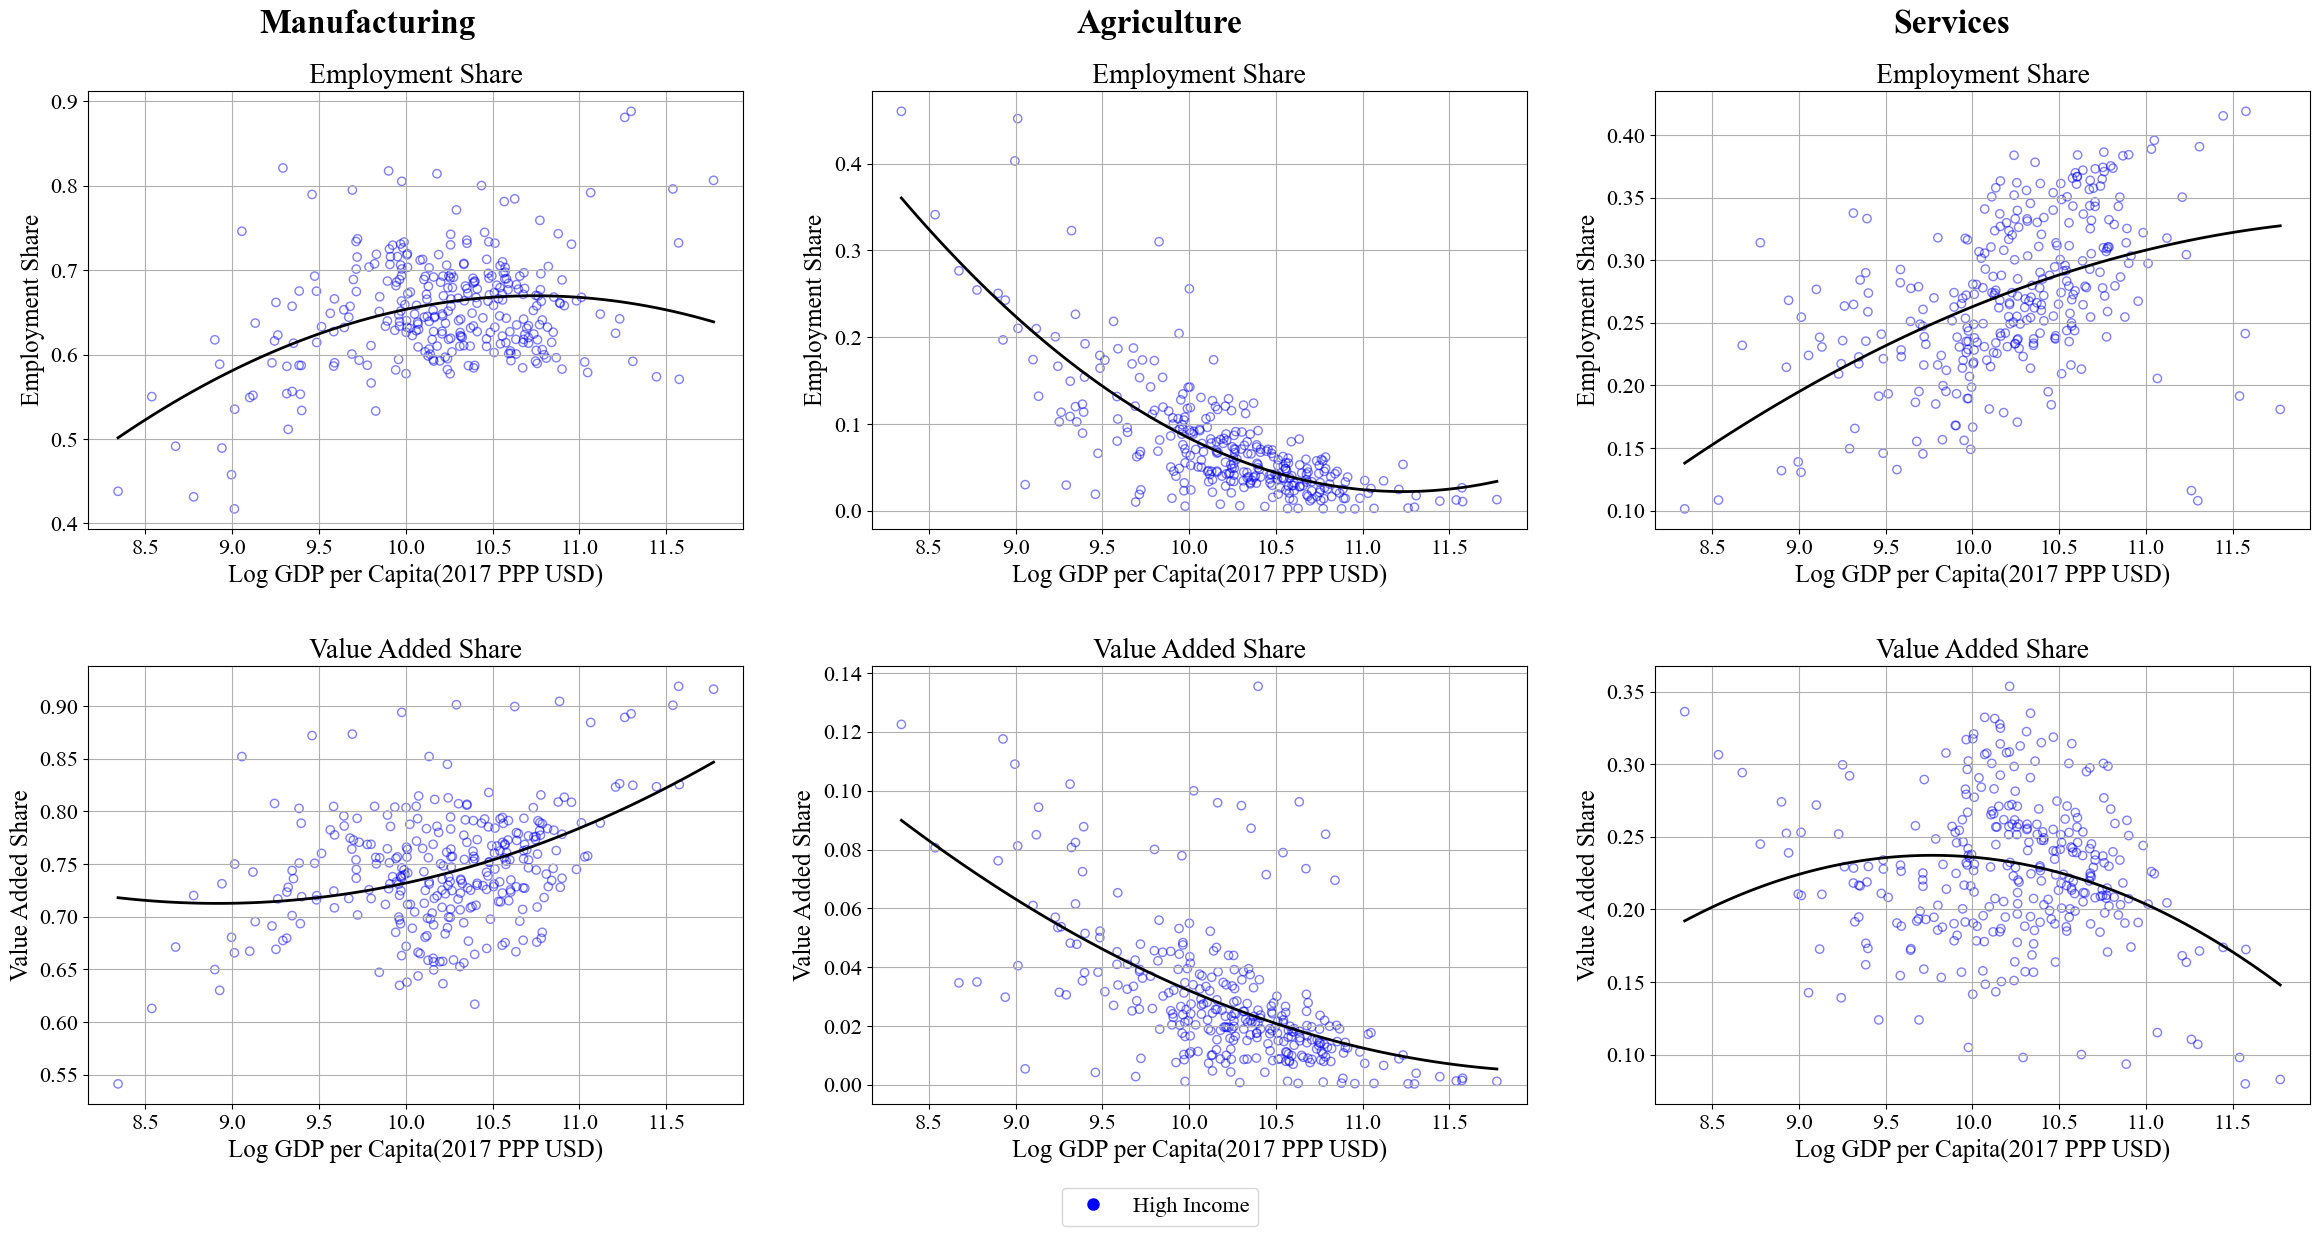

In [687]:
plot_scatter(
    df_final, 
    'income_group',
    ['Manufacturing', 'Agriculture', 'Services'],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    [['Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)'], 
     ['Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)']],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    {'HIC': 'High Income', 'LIC': 'Low Income', 'UMI': 'Upper Middle Income'}
)

#### United States

In [688]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, country_column, country_name, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    
    # Filter for only the United States
    df = df[df[country_column] == country_name]
    
    # Define the color and marker for the United States
    country_color = 'blue'
    country_marker = 'o'

    fig, axs = plt.subplots(2, 3, figsize=(24, 12))

    for i in range(2):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{j}empshare' if i == 0 else f'Good_{j}vashare'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            all_X = df[column1].values.reshape(-1, 1)
            all_y = df[column2].values

            axs[i, j].scatter(all_X, all_y, alpha=0.5, facecolors='none', edgecolors=country_color, marker=country_marker, label=country_name)

            # Fit both linear and polynomial regression models
            linear_model = LinearRegression()
            linear_model.fit(all_X, all_y)
            y_linear_fit = linear_model.predict(all_X)
            linear_r2 = r2_score(all_y, y_linear_fit)

            polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
            polynomial_model.fit(all_X, all_y)
            y_poly_fit = polynomial_model.predict(all_X)
            poly_r2 = r2_score(all_y, y_poly_fit)

            # Choose the model with the higher R-squared value
            if poly_r2 > linear_r2:
                best_model = polynomial_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)
            else:
                best_model = linear_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)

            axs[i, j].plot(X_fit, y_fit, color='black', linestyle='-', linewidth=2)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            # axs[i, j].grid(True)  # Comment out or remove this line to remove gridlines
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers

    # Set column titles
    for j in range(3):
        fig.text(0.17 + 0.33 * j, 0.99, column_titles[j], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=country_color, marker=country_marker, markersize=8, label=country_name, linestyle='None')]
    fig.legend(handles=lines, loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'country', 'United States', column_titles, titles, x_labels, y_labels, legend_names)

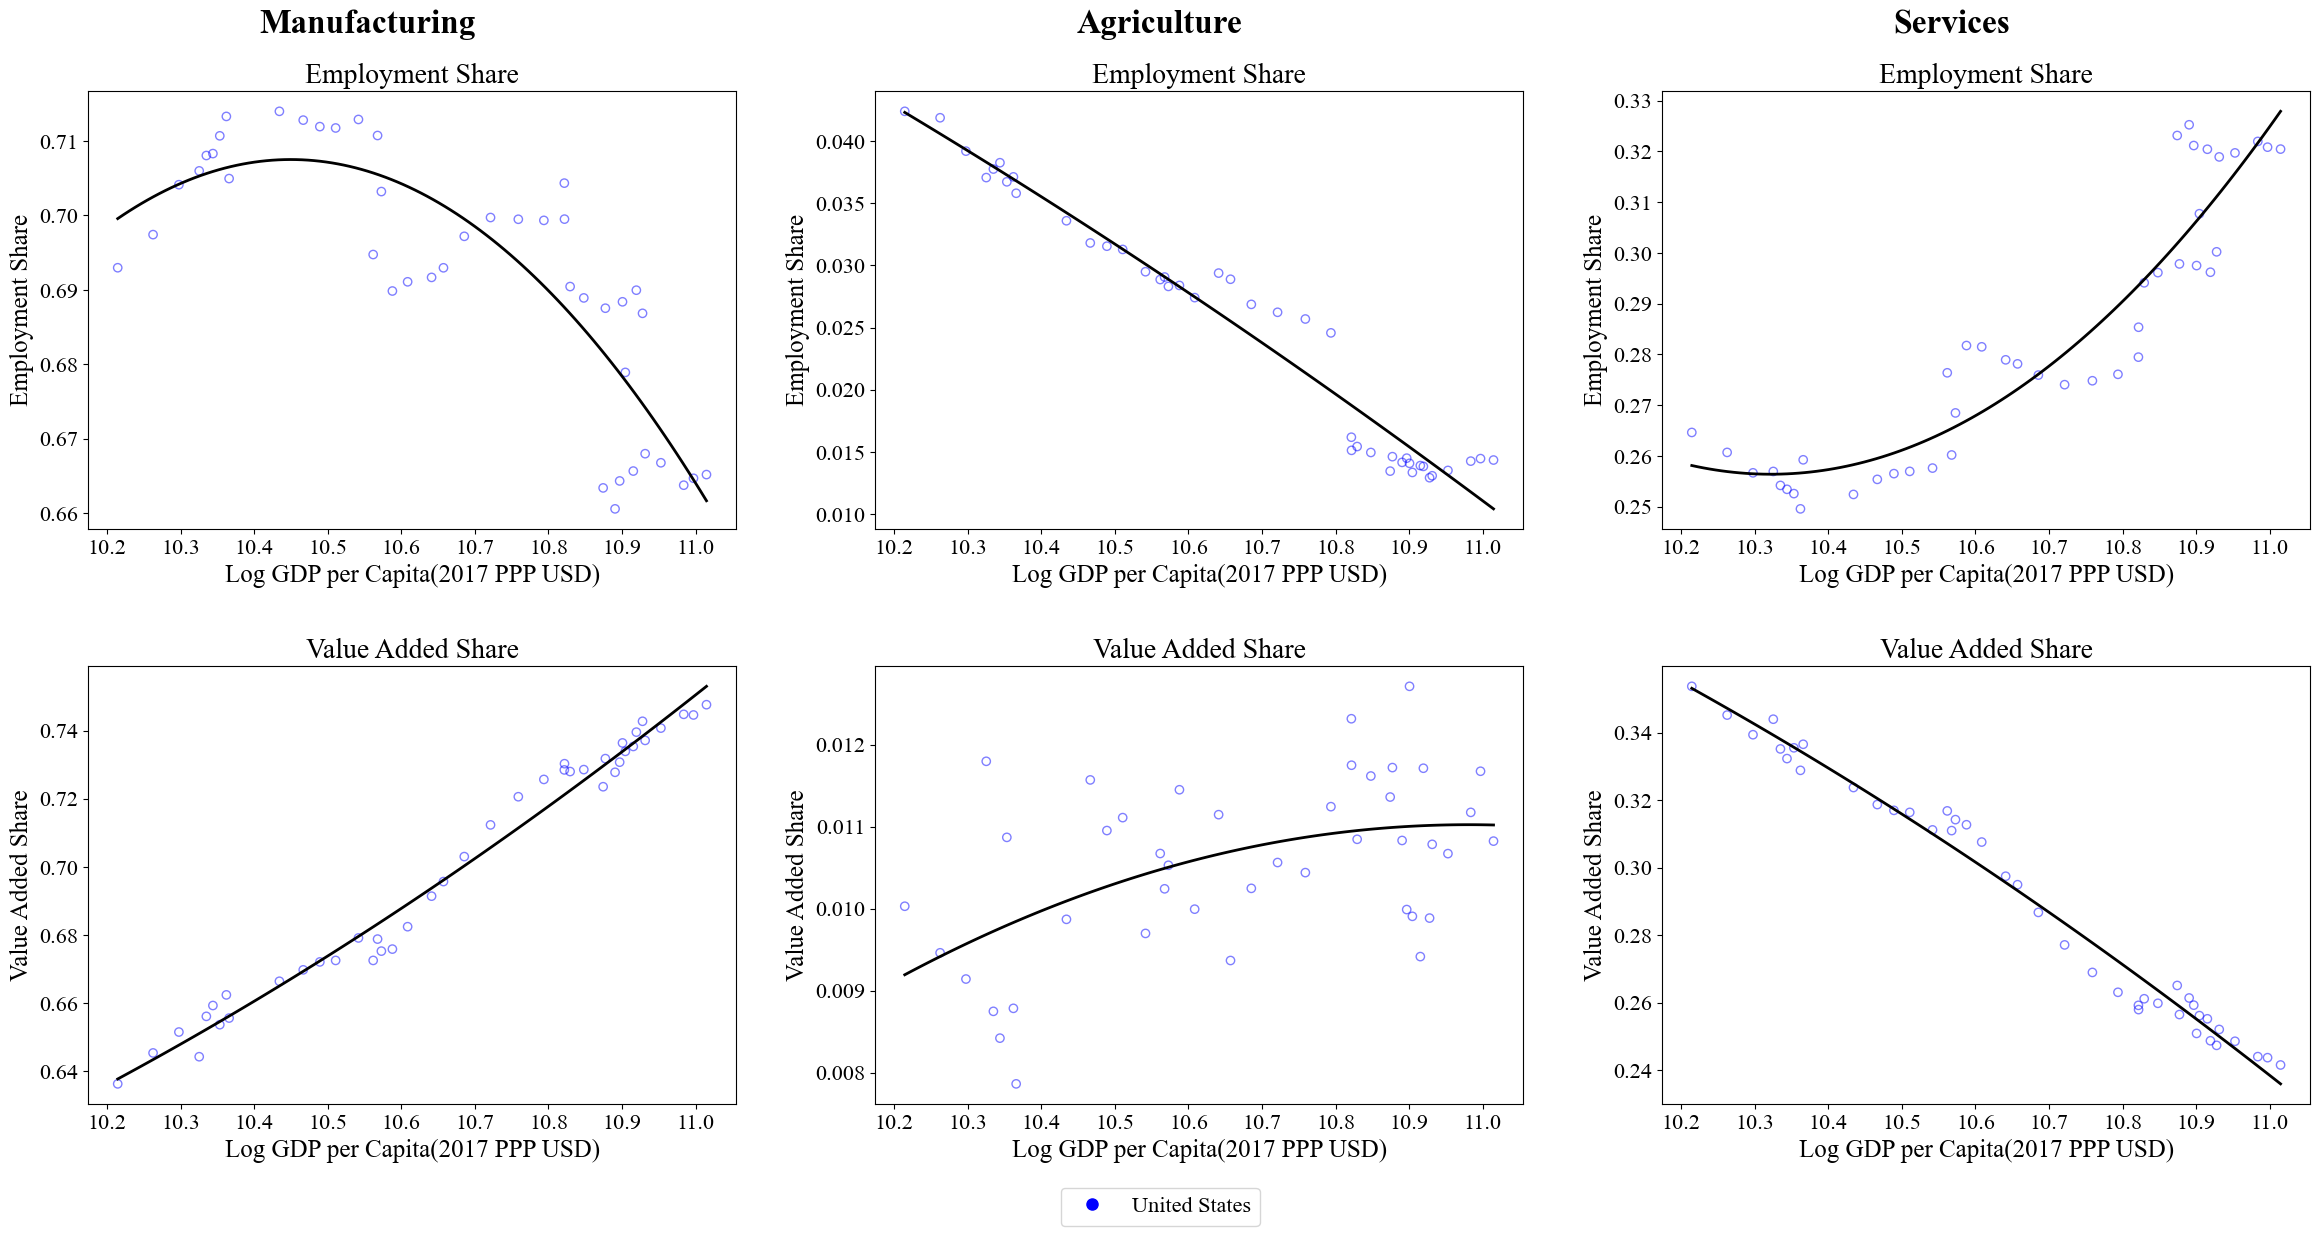

In [689]:
plot_scatter(
    df_final, 
    'country',  # Change to filter by country
    'United States',  # Specify the country name
    ['Manufacturing', 'Agriculture', 'Services'],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    [['Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)'], 
     ['Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)', 'Log GDP per Capita(2017 PPP USD)']],
    [['Employment Share', 'Employment Share', 'Employment Share'], 
     ['Value Added Share', 'Value Added Share', 'Value Added Share']],
    {'United States': 'United States'}  # Add legend names
)

In [690]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

def plot_scatter(df, group_column, column_titles, titles, x_labels, y_labels, legend_names):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]
    # Create 5-year intervals
    df = df[df['year'] % 5 == 0]
    
    # Filter for only HIC countries
    df = df[df[group_column] == 'United States']
    
    # Define the color and marker for HIC group
    group_colors = {'HIC': 'blue'}
    group_markers = {'HIC': 'o'}

    fig, axs = plt.subplots(2, 3, figsize=(24, 12))

    for i in range(2):
        for j in range(3):
            column1 = 'log_gdp_cap'
            column2 = f'Good_{j}empshare' if i == 0 else f'Good_{j}vashare'
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            all_X = []
            all_y = []

            for name, group in groups:
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  facecolors='none' if name == 'HIC' else group_colors[name], 
                                  edgecolors=group_colors[name], marker=group_markers[name],
                                  label=name)
                all_X.extend(group[column1].values)
                all_y.extend(group[column2].values)

            # Convert lists to numpy arrays
            all_X = np.array(all_X).reshape(-1, 1)
            all_y = np.array(all_y)

            # Fit both linear and polynomial regression models
            linear_model = LinearRegression()
            linear_model.fit(all_X, all_y)
            y_linear_fit = linear_model.predict(all_X)
            linear_r2 = r2_score(all_y, y_linear_fit)

            polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
            polynomial_model.fit(all_X, all_y)
            y_poly_fit = polynomial_model.predict(all_X)
            poly_r2 = r2_score(all_y, y_poly_fit)

            # Choose the model with the higher R-squared value
            if poly_r2 > linear_r2:
                best_model = polynomial_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)
            else:
                best_model = linear_model
                X_fit = np.linspace(all_X.min(), all_X.max(), 100).reshape(-1, 1)
                y_fit = best_model.predict(X_fit)

            axs[i, j].plot(X_fit, y_fit, color='black', linestyle='-', linewidth=2)

            axs[i, j].set_title(title, fontsize=20)
            axs[i, j].set_xlabel(x_label, fontsize=18)
            axs[i, j].set_ylabel(y_label, fontsize=18)
            axs[i, j].grid(True)
            axs[i, j].tick_params(axis='both', which='major', labelsize=16)  # Increase the font size of the axis numbers

    # Set column titles
    for j in range(3):
        fig.text(0.17 + 0.33 * j, 0.99, column_titles[j], ha='center', va='center', fontsize=24, weight='bold')

    # Create a legend for the whole figure with the desired order
    legend_order = ['HIC']  # Only HIC
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in legend_order]
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.02), fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.show()

# Example usage
# plot_scatter(df, 'income_group', column_titles, titles, x_labels, y_labels, legend_names)

#### In what follows I attempt to make the computations for ($\gamma_i-\gamma_0$)

Thaking $t$ as the last period of the data,
$$a_{i0}= \frac{A_{i,0}}{A_{0,0}}$$

$$a_{it}= \frac{A_{i,t}}{A_{0,t}}=\frac{A_{1,0}(1+ \gamma_1)^t}{A_{0,0}(1+ \gamma_0)^t}$$

Hence, between the begining period (0) and the end period (t):
$$\frac{a_{i,t}}{a_{i0}}=\frac{(1+ \gamma_i)^t}{(1+ \gamma_0)^t}$$

$$ln(\frac{a_{i,t}}{a_{i0}})=tln(1+ \gamma_i)-tln(1+ \gamma_0)$$

Using Taylor series expansions, if $\gamma_i$ and $\gamma_0$ are small (we expect that), then:

$ln(1+ \gamma_i) \approx \gamma_i$  and $ln(1+ \gamma_0) \approx \gamma_0$

Hence: 

$$ln(\frac{a_{i,t}}{a_{i0}})=t(\gamma_i- \gamma_0)$$

Hence:
$$(\gamma_i- \gamma_0)= ln(\frac{a_{i,t}}{a_{i0}})t^{-1}$$

That is the differences in TFP growth rates between sector $\textit{i} $ and the manufacturing good is correlated with the $a_{it}$ values. 

#### Two-Period Analysis

taking annual beta as 0.96, then 0.96^43=0.14. I am using a starting year of 1975

In [691]:
theta=0.32
beta=0.17
delta=1
eps=0.3
om1=0.1
om0=0.15
#gamma_0=0.02
#gamma_n=0.01
om2=1-om1-om0
const=0
year_min=1975
year_max=2017
val=0.96**43*0.32

In [692]:
val

0.0553111895879832

In [693]:

def compute_values(df, theta, beta,eps,om0,om1,om2,delta, const, year_min, year_max):
    #val=(1+ gamma_0)*(1+gamma_n)*beta*theta
    #drop if Good_0empshare is less than val
    df=df.drop(df[df['Good_0empshare']<val].index)

    #keep only data starting from year_min and ending year_max
    df = df[(df['year'] >= year_min) & (df['year'] <= year_max)]
    print(df.shape)
    df = df.groupby('country').filter(lambda x: x['year'].min() == year_min and x['year'].max() == year_max)
    print(df.shape)
    #create a time variable
    df['time'] = df.groupby('country')['year'].transform(lambda x: x - x.min())
    years=[year_min,year_max]
    df=df[df['year'].isin(years)]
    
    df['X_t']=(1-val)/(df['Good_0empshare']-val)

    #replacing values of X_t with missing values if (df['Good_0share']-theta*beta) is leas than 0.1
    #computing the x_it values
    df['x_1t']=df['Good_1empshare']/(df['Good_0empshare']-val)
   

    df['x_2t']=df['Good_2empshare']/(df['Good_0empshare']-val)
    

    df['x_0t']=1
    df['sum']=df['x_0t']+df['x_1t']+df['x_2t']
    df['diff']=df['sum']-df['X_t']

    #computing the a_it values
    Q=1/((1-eps)*(1-theta))
    df['Good1_a']= (om1/om0)**(eps*Q) /df['x_1t']**(Q)
    df['Good2_a']= (om2/om0)**(eps*Q) /df['x_2t']**(Q)
    df['Good0_a']= (om0/om0)**(eps*Q) /df['x_0t']**(Q)
    #by country compute the ratio of the values
    df['Good1_ratio'] = df.groupby('country')['Good1_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    df['Good2_ratio'] = df.groupby('country')['Good2_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    df['Good0_ratio'] = df.groupby('country')['Good0_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    
    #compute the log of the values
    df['log_Good1_ratio']=np.log(df['Good1_ratio'])
    df['log_Good2_ratio']=np.log(df['Good2_ratio'])
    df['log_Good0_ratio']=np.log(df['Good0_ratio'])
        #creating t_inverse
    df['t_inverse'] = df[df['year'] == 2017].groupby('country')['time'].transform(lambda x: 1 / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    #multiply by the values by ther inverse of the end period time value
    df['log_Good1_ratio_T']= df['log_Good1_ratio']* df['t_inverse']
    df['log_Good2_ratio_T']= df['log_Good2_ratio']*df['t_inverse']
    df['log_Good0_ratio_T']=df['log_Good0_ratio']* df['t_inverse']
    return df


In [694]:
df4=compute_values(df_final, theta, beta,eps,om0,om1,om2,delta, const, year_min, year_max)

(3470, 141)
(2236, 141)


/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3513712898.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good0_a']= (om0/om0)**(eps*Q) /df['x_0t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3513712898.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good1_ratio'] = df.groupby('country')['Good1_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3513712898.py:37: 

In [695]:
#use reshape to visualize the data
df4.pivot_table(values=['log_Good1_ratio_T','log_Good2_ratio_T'], index='country', columns='year')

log_Good1_ratio_T log_Good2_ratio_T
year                                   2017.0            2017.0
country                                                        
Australia                            0.045892         -0.022650
Austria                              0.049182         -0.025706
Belgium                              0.051578         -0.034627
Botswana                             0.053104          0.033027
Brazil                               0.083944         -0.007652
Burkina Faso                         0.161853          0.087838
Cameroon                             0.070331          0.081546
Canada                               0.060498         -0.009871
Chile                                0.068509          0.004680
China                                0.115494         -0.018527
China, Hong Kong SAR                 0.122132         -0.035706
Colombia                             0.058185          0.028128
Costa Rica                           0.037015          0.001865
Denmark                              0.069968         -0.015860
Egypt                                0.075234          0.028286
Finland                              0.067417         -0.031551
France                               0.062802         -0.022362
Germany                              0.089313         -0.025555
Ghana                                0.059141          0.001303
India                                0.067267          0.041928
Indonesia                            0.078035          0.028285
Italy                                0.077677         -0.018351
Japan                                0.062693         -0.050687
Kenya                                0.159148          0.102243
Lesotho                              0.065139          0.075890
Luxembourg                           0.073189         -0.031069
Malawi                               0.106536          0.025848
Malaysia                             0.108323          0.030408
Mauritius                            0.088308          0.021022
Mexico                               0.067173          0.014179
Mongolia                             0.039121          0.003777
Morocco                              0.059085          0.011338
Mozambique                           0.072221          0.033577
Namibia                              0.090822          0.018121
Netherlands                          0.038579         -0.008253
Nigeria                              0.046960          0.021363
Norway                               0.070980         -0.024320
Pakistan                             0.030839          0.013623
Philippines                          0.067165          0.021203
Republic of Korea                    0.139537         -0.018751
Senegal                              0.074778          0.048638
Singapore                            0.108035          0.044609
South Africa                         0.064544         -0.018432
Spain                                0.081533         -0.039349
Sri Lanka                            0.069575          0.019455
Sweden                               0.054164         -0.015630
Taiwan                               0.083324         -0.000774
Thailand                             0.110761          0.043719
United Kingdom                       0.025921         -0.027467
United Republic of Tanzania          0.115216          0.080061
United States                        0.051964         -0.011808
Zambia                               0.017226          0.080088

In [696]:
# Create a DataFrame that contains the 1975 values for each country
df_1975 = df4[df4['year'] == 1975].set_index('country')['log_gdp_cap']

# Map these values to a new column in the original DataFrame
df4['log_gdp_cap_1975'] = df4['country'].map(df_1975)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3101132226.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df4['log_gdp_cap_1975'] = df4['country'].map(df_1975)


In [697]:
#sort by country and year
df4.sort_values(['country', 'year'], inplace=True)

In [698]:
import seaborn as sns
import statsmodels.api as sm

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    # Define the new labels for each group
    group_labels = {'HIC': 'High Income', 'LIC': 'Low Income', 'UMI': 'Upper Middle Income'}

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           color=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=None)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=24,weight='bold')
        axs[i].set_xlabel(x_label, fontsize=18)
        axs[i].set_ylabel(y_label, fontsize=18)
        axs[i].grid(True)

        # Add textbox with coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        textstr = f'Coefficient: {coef:.2f}\nT-statistic: {t_stat:.2f}\nP-value: {p_value:.4f}'
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[i].text(0.75, 0.95, textstr, transform=axs[i].transAxes, fontsize=14,
                    verticalalignment='top', bbox=props)

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None') for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09),fontsize=16)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()

In [699]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'LIC': 'red', 'UMI': 'green', 'HIC': 'blue'}  # Changed order
    group_markers = {'LIC': 's', 'UMI': '^', 'HIC': 'o'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=None)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)
        #axs[i].grid(True)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in ['LIC', 'UMI', 'HIC']]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()

In [700]:
df_2017=df4[df4['year']==2017]

In [701]:
#count number of observstions
df_2017['log_Good1_ratio_T'].count()

52

Plot (a):
Coefficient: -0.01
T-statistic: -2.17
P-value: 0.0347

Plot (b):
Coefficient: -0.03
T-statistic: -7.87
P-value: 0.0000



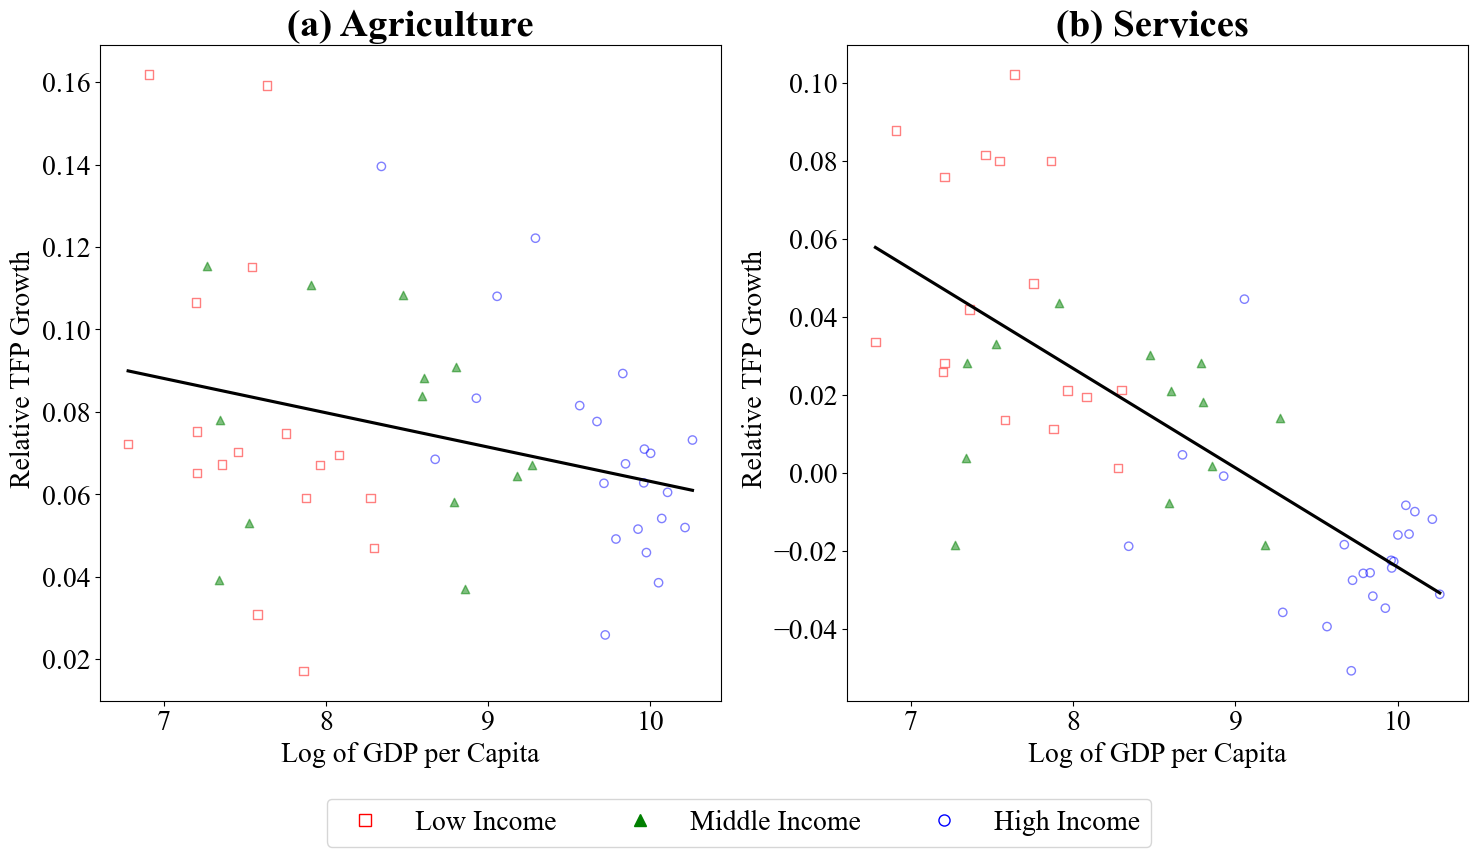

In [702]:
plot_scatter2(
    df_2017,  # Data
    [('log_gdp_cap_1975','log_Good1_ratio_T'), ('log_gdp_cap_1975','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture', 'Services '],  # Titles
    ['Log of GDP per Capita','Log of GDP per Capita'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)

In [703]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'LIC': 'red', 'UMI': 'green', 'HIC': 'blue'}  # Changed order
    group_markers = {'LIC': 's', 'UMI': '^', 'HIC': 'o'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Upper Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=95)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)
        #axs[i].grid(True)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()

Plot (a):
Coefficient: -0.01
T-statistic: -2.17
P-value: 0.0347

Plot (b):
Coefficient: -0.03
T-statistic: -7.87
P-value: 0.0000



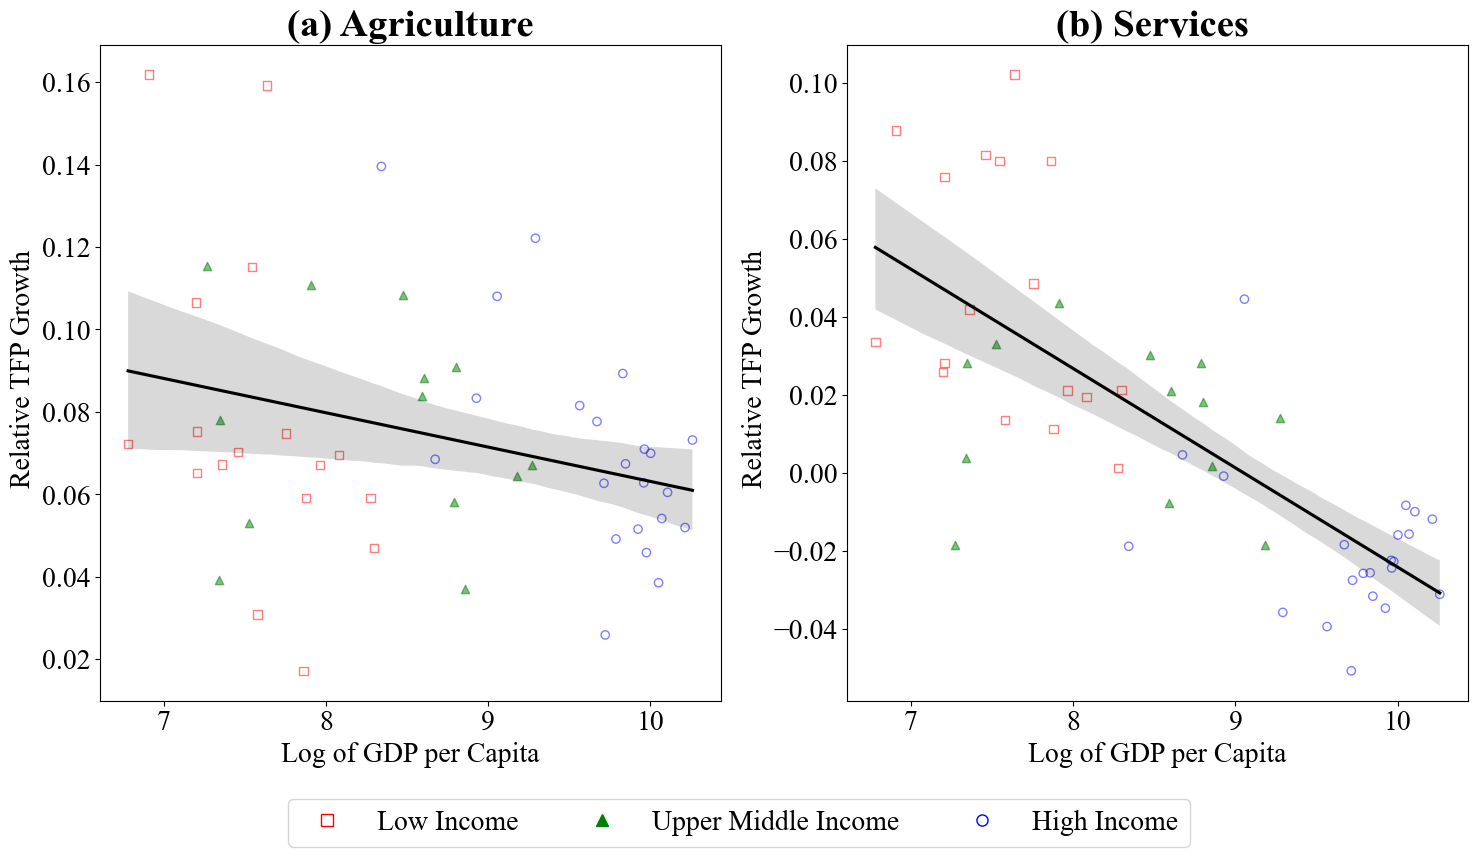

In [704]:
plot_scatter2(
    df_2017,  # Data
    [('log_gdp_cap_1975','log_Good1_ratio_T'), ('log_gdp_cap_1975','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture', 'Services '],  # Titles
    ['Log of GDP per Capita','Log of GDP per Capita'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)

#### Now the Annual data 
To start with, Instead of using annual intervals, we use 5-year intervals. This allows us to purge out business cycle effects.  as a result, the following caliberations are employed. Starting with 1975 leads to 54 countries.

beta = 0.96^5 =0.815

theta = 0.32

delta = 0.1 

(1- delta) = (1-0.1)^5 = 0.59

gamma_0 = 0.02

(1 + gamma_0) = (1.02)^5= 1.104

gamma_n = 0.01

(1+gamma_n) =  (1.01)^5 = 1.05

These parameters will generate a minimum threshold of 0.29 for n0_t. This makes us lose about 33% of the data.

In [756]:
theta=0.32
beta=0.816
delta=0.1
delta_n=(1- delta)**5
eps=0.3
om1=0.1
om0=0.25
gamma_0=0.02
gamma_0n=(1+gamma_0)**5
gamma_n=0.01
gamma_n2=(1+ gamma_n)**5
om2=1-om1-om0
const=0
year_min=1975
year_max=2017

In [757]:
(gamma_0n*gamma_n2- delta_n)*beta

0.4650465765531151

In [758]:
val=( gamma_0n*gamma_n2- delta_n)*beta*theta
den=1-beta*(delta_n)
val/den

0.2871986616975663

Now I proceed by adjusting the data to include all countries. Here i still set the minimum year to 1975 by allow all countries with data starting after 1975 to be included.the time variable is set to 5 (5-year intervals)

In [759]:
def compute_values3(df, theta, beta, eps, om0, om1, om2, delta,delta_n,gamma_0n,gamma_n2, const):
    # Set the minimum year to 1975
    year_min = 1975

    # Filter data within the year range and ensure full coverage
    df = df[df['year'] >= year_min]
    df = df.groupby('country').filter(lambda x: x['year'].min() >= year_min)

    # Create a time variable
    df['time'] = 5
    df = df[df['year'] % 5 == 0]  # Keep only years that are multiples of 5
    val=((gamma_0n)*(gamma_n2)-(delta_n))*beta*theta
    den=1-beta*(delta_n)
    sen=val/den

    # Calculate X_t for all years, with checks for invalid values
    df['X_t'] = np.where(df['Good_0empshare'] - sen > const, 
                         (1-sen)/(df['Good_0empshare']-sen), 
                         np.nan)

    # Calculate x_1t and x_2t for all years with a condition check
    valid_condition = (df['Good_0empshare'] - sen > const)
    df['x_1t'] = np.where(valid_condition, df['Good_1empshare'] / (df['Good_0empshare'] - sen), np.nan)
    df['x_2t'] = np.where(valid_condition, df['Good_2empshare'] / (df['Good_0empshare'] - sen), np.nan)

    # Define x_0t for all years
    df['x_0t'] = 1

    # Compute sum and difference for all years
    df['sum'] = df['x_0t'] + df['x_1t'] + df['x_2t']
    df['diff'] = df['sum'] - df['X_t']

    # Compute the Q value
    Q = 1 / ((1 - eps) * (1 - theta))

    # Compute the a_it values for each year
    df['Good1_a'] = (om1 / om0)**(eps * Q) / df['x_1t']**(Q)
    df['Good2_a'] = (om2 / om0)**(eps * Q) / df['x_2t']**(Q)
    df['Good0_a'] = (om0 / om0)**(eps * Q) / df['x_0t']**(Q)

    # By country, compute the ratio of values between each year and the first year
    df['Good1_ratio'] = df.groupby('country')['Good1_a'].transform(lambda x: x / x.shift(1))
    df['Good2_ratio'] = df.groupby('country')['Good2_a'].transform(lambda x: x / x.shift(1))
    df['Good0_ratio'] = df.groupby('country')['Good0_a'].transform(lambda x: x / x.shift(1))

    # Compute the log of the ratios
    df['log_Good1_ratio'] = np.log(df['Good1_ratio'])
    df['log_Good2_ratio'] = np.log(df['Good2_ratio'])
    df['log_Good0_ratio'] = np.log(df['Good0_ratio'])

    # Create t_inverse for each year
    df['t_inverse'] = df['time'].replace(0, np.nan).apply(lambda x: 1 / x if pd.notnull(x) else np.nan)

    # Multiply the log values by the inverse of the time value for each year
    df['log_Good1_ratio_T'] = df['log_Good1_ratio'] * df['t_inverse']
    df['log_Good2_ratio_T'] = df['log_Good2_ratio'] * df['t_inverse']
    df['log_Good0_ratio_T'] = df['log_Good0_ratio'] * df['t_inverse']

    return df

In [760]:
df6=compute_values3(df_final, theta, beta,eps,om0,om1,om2,delta,delta_n,gamma_0n,gamma_n2, const)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2052036197.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good1_a'] = (om1 / om0)**(eps * Q) / df['x_1t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2052036197.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good2_a'] = (om2 / om0)**(eps * Q) / df['x_2t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2052036197.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

In [710]:
#df_check=df6[['country','year','income_group','x_1t','x_2t','x_0t', 'Good1_a','Good2_a','Good0_a','X_t']]
#df_check.sort_values(['country','year'])

In [761]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'LIC': 'red','UMI': 'green','HIC': 'blue'}  # Changed order
    group_markers = {'HIC': 'o', 'UMI': '^', 'LIC': 's'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=None)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)
        #axs[i].grid(True)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()


Plot (a):
Coefficient: -0.04
T-statistic: -5.00
P-value: 0.0000

Plot (b):
Coefficient: -0.06
T-statistic: -7.64
P-value: 0.0000



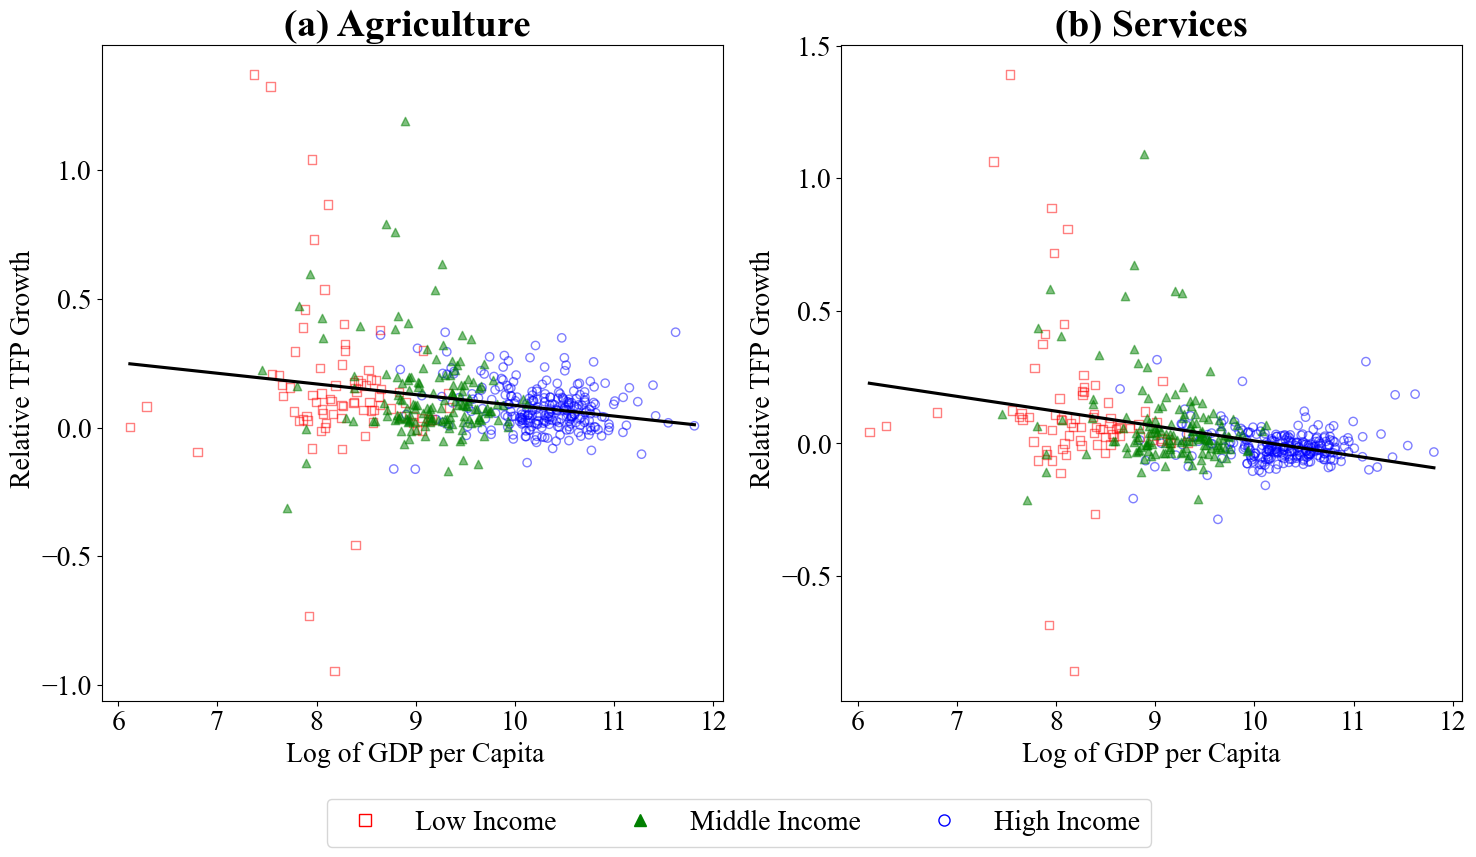

In [762]:
#plot a scatter plot of the ratios with the log of GDP per capita
plot_scatter2(
    df6,  # Data
    [('log_gdp_cap_lag','log_Good1_ratio_T'),('log_gdp_cap_lag','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture ', 'Services'],  # Titles
    [' Log of GDP per Capita','Log of GDP per Capita'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)


In [713]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'LIC': 'red', 'UMI': 'green', 'HIC': 'blue'}  # Changed order
    group_markers = {'LIC': 's', 'UMI': '^', 'HIC': 'o'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Upper Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Generate predictions and prediction intervals
        predictions = results.get_prediction(X)
        prediction_summary_frame = predictions.summary_frame(alpha=0.1)
        df_clean['predicted'] = prediction_summary_frame['mean']
        df_clean['predicted_lower'] = prediction_summary_frame['obs_ci_lower']
        df_clean['predicted_upper'] = prediction_summary_frame['obs_ci_upper']

        # Sort the values for plotting
        df_clean = df_clean.sort_values(by=column1)

        # Plot the regression line
        axs[i].plot(df_clean[column1], df_clean['predicted'], color='black', linestyle='-', linewidth=2)

        # Plot the prediction interval
        axs[i].fill_between(df_clean[column1], df_clean['predicted_lower'], df_clean['predicted_upper'], color='gray', alpha=0.3)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()

Plot (a):
Coefficient: -0.04
T-statistic: -5.00
P-value: 0.0000

Plot (b):
Coefficient: -0.06
T-statistic: -7.64
P-value: 0.0000



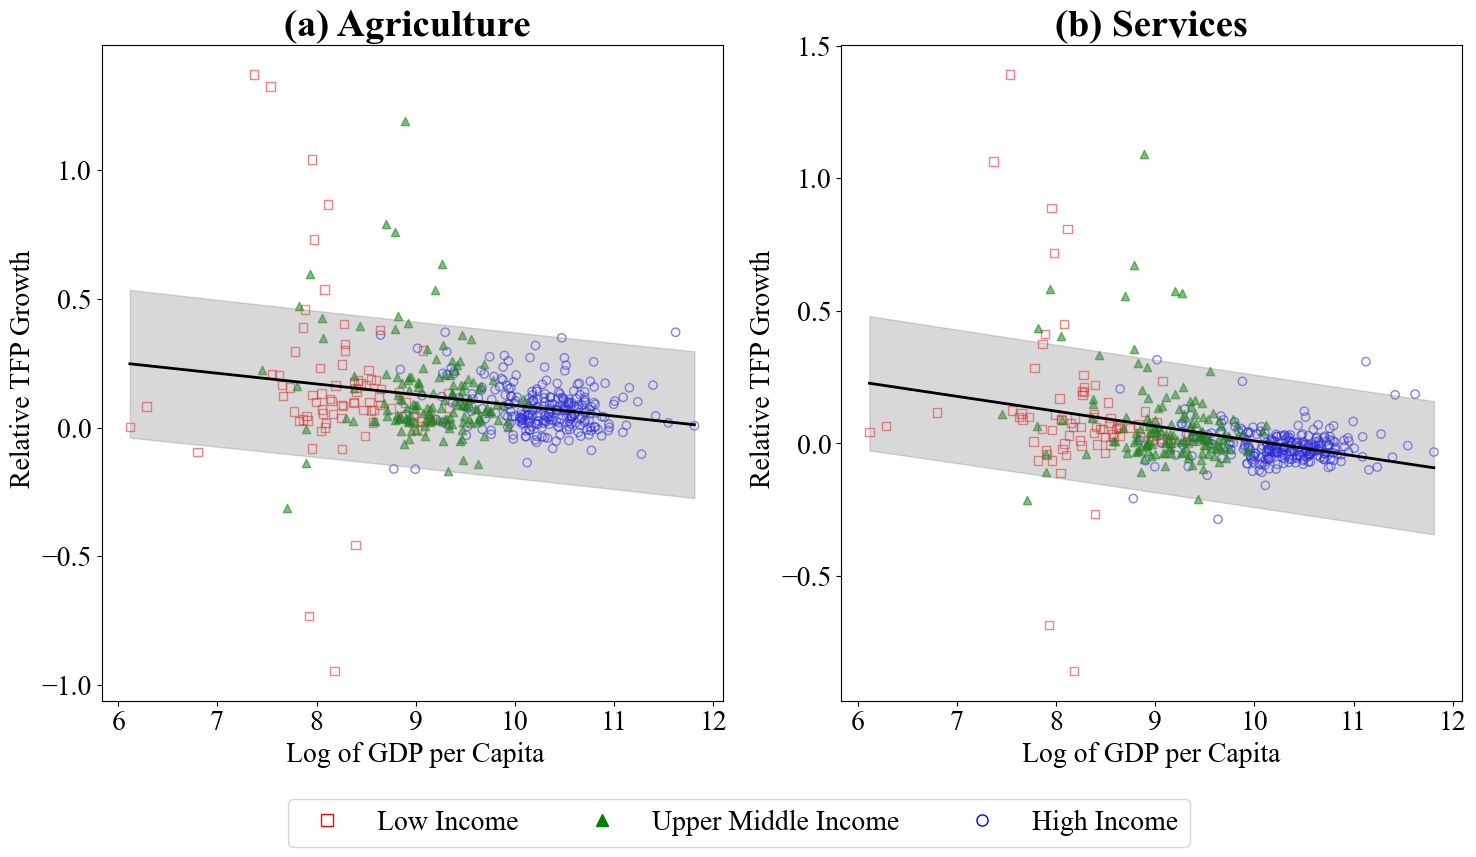

In [714]:
#plot a scatter plot of the ratios with the log of GDP per capita
plot_scatter2(
    df6,  # Data
    [('log_gdp_cap_lag','log_Good1_ratio_T'),('log_gdp_cap_lag','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture ', 'Services'],  # Titles
    [' Log of GDP per Capita','Log of GDP per Capita'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)


In [715]:
df6.groupby('income_group')['log_Good1_ratio_T'].mean()

income_group
HIC    0.077229
LIC    0.147078
UMI    0.124539
Name: log_Good1_ratio_T, dtype: float64

In [716]:
df6.groupby('income_group')['log_Good2_ratio_T'].mean()

income_group
HIC   -0.010261
LIC    0.107255
UMI    0.066294
Name: log_Good2_ratio_T, dtype: float64

#### Testing the significance of the means accross sectors

In [775]:
import pandas as pd
from scipy.stats import ttest_1samp, t
import numpy as np

# Assuming df6 is your DataFrame and it contains the columns 'income_group' and 'log_Good1_ratio_T'

# Filter the data for HIC group
hic_data = df6[df6['income_group'] == 'HIC']['log_Good1_ratio_T'].dropna()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(hic_data, 0)

# Calculate the confidence interval
confidence_level = 0.95
degrees_freedom = len(hic_data) - 1
mean = np.mean(hic_data)
std_err = np.std(hic_data, ddof=1) / np.sqrt(len(hic_data))
confidence_interval = t.interval(confidence_level, degrees_freedom, mean, std_err)

# Print the results
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')
print(f'95% Confidence interval: {confidence_interval}')

# Interpret the results
alpha = 0.05  # Common significance level
if p_value < alpha:
    print(f"The mean of LIC for log_Good1_ratio_T is significantly different from zero (t-statistic = {t_stat:.2f}).")
else:
    print(f"There is no significant difference between the mean of LIC for log_Good1_ratio_T and zero (t-statistic = {t_stat:.2f}).")

T-statistic: 14.07
P-value: 0.0000
95% Confidence interval: (0.06642266777896864, 0.08803568005443345)
The mean of LIC for log_Good1_ratio_T is significantly different from zero (t-statistic = 14.07).


In [780]:
import pandas as pd
from scipy.stats import ttest_1samp, t
import numpy as np

# Assuming df6 is your DataFrame and it contains the columns 'income_group' and 'log_Good1_ratio_T'

# Filter the data for HIC group
hic_data = df6[df6['income_group'] == 'LIC']['log_Good2_ratio_T'].dropna()

# Perform the one-sample t-test
t_stat, p_value = ttest_1samp(hic_data, 0)

# Calculate the confidence interval
confidence_level = 0.95
degrees_freedom = len(hic_data) - 1
mean = np.mean(hic_data)
std_err = np.std(hic_data, ddof=1) / np.sqrt(len(hic_data))
confidence_interval = t.interval(confidence_level, degrees_freedom, mean, std_err)

# Print the results
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_value:.4f}')
print(f'95% Confidence interval: {confidence_interval}')

# Interpret the results
alpha = 0.05  # Common significance level
if p_value < alpha:
    print(f"The mean of LIC for log_Good1_ratio_T is significantly different from zero (t-statistic = {t_stat:.2f}).")
else:
    print(f"There is no significant difference between the mean of LIC for log_Good1_ratio_T and zero (t-statistic = {t_stat:.2f}).")

T-statistic: 3.45
P-value: 0.0009
95% Confidence interval: (0.04539889167102647, 0.16911035730397972)
The mean of LIC for log_Good1_ratio_T is significantly different from zero (t-statistic = 3.45).


## Now compare plots above with the relative labor productivity growth from data.

Here we compare the relative TFP growth rates to relative labor producivities. We see that relative TFP growth rates have a relationship with GDP per capita. But labor productivity does not appear to have any relationship. 

In [719]:
import numpy as np
import scipy.stats as stats

def plot_scatter3(df, group_column, column_pairs, titles, x_labels, y_labels, legend_names, row_titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Change to 2 rows and 2 columns

    for i in range(2):
        # Add a title to each row
        # Add a title for the row
        fig.text(0.5, 1 - (i * 0.50)-0.005, row_titles[i], ha='center', va='center', fontsize=16,weight='bold')

        for j in range(2):
            column1, column2 = column_pairs[i][j]
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            for name, group in groups:
                group = group.dropna(subset=[column1, column2])  # Drop rows with NaN values
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  color=group_colors[name], marker=group_markers[name],
                                  label=name)

            # Calculate line of best fit using all data in subplot
            m, b = np.polyfit(df[column1], df[column2], 1)
            axs[i, j].plot(df[column1], m*df[column1] + b, color='black')

            # Calculate t-stat and p-value using all data in subplot
            slope, intercept, r_value, p_value, std_err = stats.linregress(df[column1], df[column2])
            t_stat = slope/std_err

            # Add text box with stats
            stats_text = f'Coefficient: {slope:.2f}\nT-stat: {t_stat:.2f}\nP-value: {p_value:.2f}'
            axs[i, j].text(0.05, 0.95, stats_text, transform=axs[i, j].transAxes, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

            axs[i, j].set_title(title, fontsize=16)
            axs[i, j].set_xlabel(x_label, fontsize=12)
            axs[i, j].set_ylabel(y_label, fontsize=12)
            axs[i, j].grid(True)
            axs[i, j].set_ylim(-1, 1)  # Set y-axis limits

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in group_colors.keys()]  # Use the new name for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.008))  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.subplots_adjust(hspace=0.5)  # Increase the height spacing
    plt.show()

In [720]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter3(df, group_column, column_pairs, titles, x_labels, y_labels, legend_names, row_titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    df = df[df['year'] >= 1975]

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'LIC': 'red', 'UMI': 'green'}
    group_markers = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Change to 2 rows and 2 columns

    for i in range(2):
        # Add a title to each row
        fig.text(0.5, 1 - (i * 0.50)-0.005, row_titles[i], ha='center', va='center', fontsize=16, weight='bold')

        for j in range(2):
            column1, column2 = column_pairs[i][j]
            title = titles[i][j]
            x_label = x_labels[i][j]
            y_label = y_labels[i][j]

            groups = df.groupby(group_column)

            for name, group in groups:
                group = group.dropna(subset=[column1, column2])  # Drop rows with NaN values
                axs[i, j].scatter(group[column1], group[column2], alpha=0.5, 
                                  color=group_colors[name], marker=group_markers[name],
                                  label=name)

            # Calculate line of best fit using all data in subplot
            m, b = np.polyfit(df[column1], df[column2], 1)
            axs[i, j].plot(df[column1], m*df[column1] + b, color='black')

            # Calculate t-stat and p-value using all data in subplot
            slope, intercept, r_value, p_value, std_err = stats.linregress(df[column1], df[column2])
            t_stat = slope / std_err

            # Print coefficient, t-statistic, and p-value
            print(f'Plot ({i+1}, {j+1}):')
            print(f'Coefficient: {slope:.2f}')
            print(f'T-statistic: {t_stat:.2f}')
            print(f'P-value: {p_value:.2f}\n')

            axs[i, j].set_title(title, fontsize=16)
            axs[i, j].set_xlabel(x_label, fontsize=12)
            axs[i, j].set_ylabel(y_label, fontsize=12)
            axs[i, j].grid(True)
            axs[i, j].set_ylim(-1, 1)  # Set y-axis limits

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=legend_names[name], linestyle='None') for name in group_colors.keys()]  # Use the new name for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.008))  # Adjust the bbox_to_anchor parameter

    plt.tight_layout(pad=3.0)  # Increase the padding
    plt.subplots_adjust(hspace=0.5)  # Increase the height spacing
    plt.show()

# Example usage
# plot_scatter3(df, group_column, column_pairs, titles, x_labels, y_labels, legend_names, row_titles)

In [721]:
df6['log_Good1_lpus']=np.log(df6['Good1_lpus']).copy()
df6['log_Good2_lpus']=np.log(df6['Good2_lpus']).copy()
df6['log_Good0_lpus']=np.log(df6['Good0_lpus']).copy()
    # Compute the growth rates of labor productivity
df6['Good0_lpus_gr'] = (df6.groupby('country')['log_Good1_lpus'].diff())/5
df6['Good1_lpus_gr'] = (df6.groupby('country')['log_Good2_lpus'].diff())/5
df6['Good2_lpus_gr'] = (df6.groupby('country')['log_Good0_lpus'].diff())/5

    # Compute the differences in growth rates of labor productivity
df6['ag_mn_diff'] = df6['Good1_lpus_gr'] - df6['Good0_lpus_gr']
df6['ser_mn_diff'] = df6['Good2_lpus_gr'] - df6['Good0_lpus_gr']

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2629986806.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6['Good0_lpus_gr'] = (df6.groupby('country')['log_Good1_lpus'].diff())/5
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2629986806.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6['Good1_lpus_gr'] = (df6.groupby('country')['log_Good2_lpus'].diff())/5
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/2629986806.py:7: PerformanceWarning: DataFrame is highly fragme

In [722]:
df6 = df6.dropna(subset=['log_gdp_cap_lag', 'log_Good1_ratio_T', 'log_Good2_ratio_T', 'ag_mn_diff', 'ser_mn_diff'])

Plot (1, 1):
Coefficient: -0.04
T-statistic: -5.00
P-value: 0.00

Plot (1, 2):
Coefficient: -0.06
T-statistic: -7.64
P-value: 0.00

Plot (2, 1):
Coefficient: 0.00
T-statistic: 0.17
P-value: 0.86

Plot (2, 2):
Coefficient: 0.00
T-statistic: 0.57
P-value: 0.57



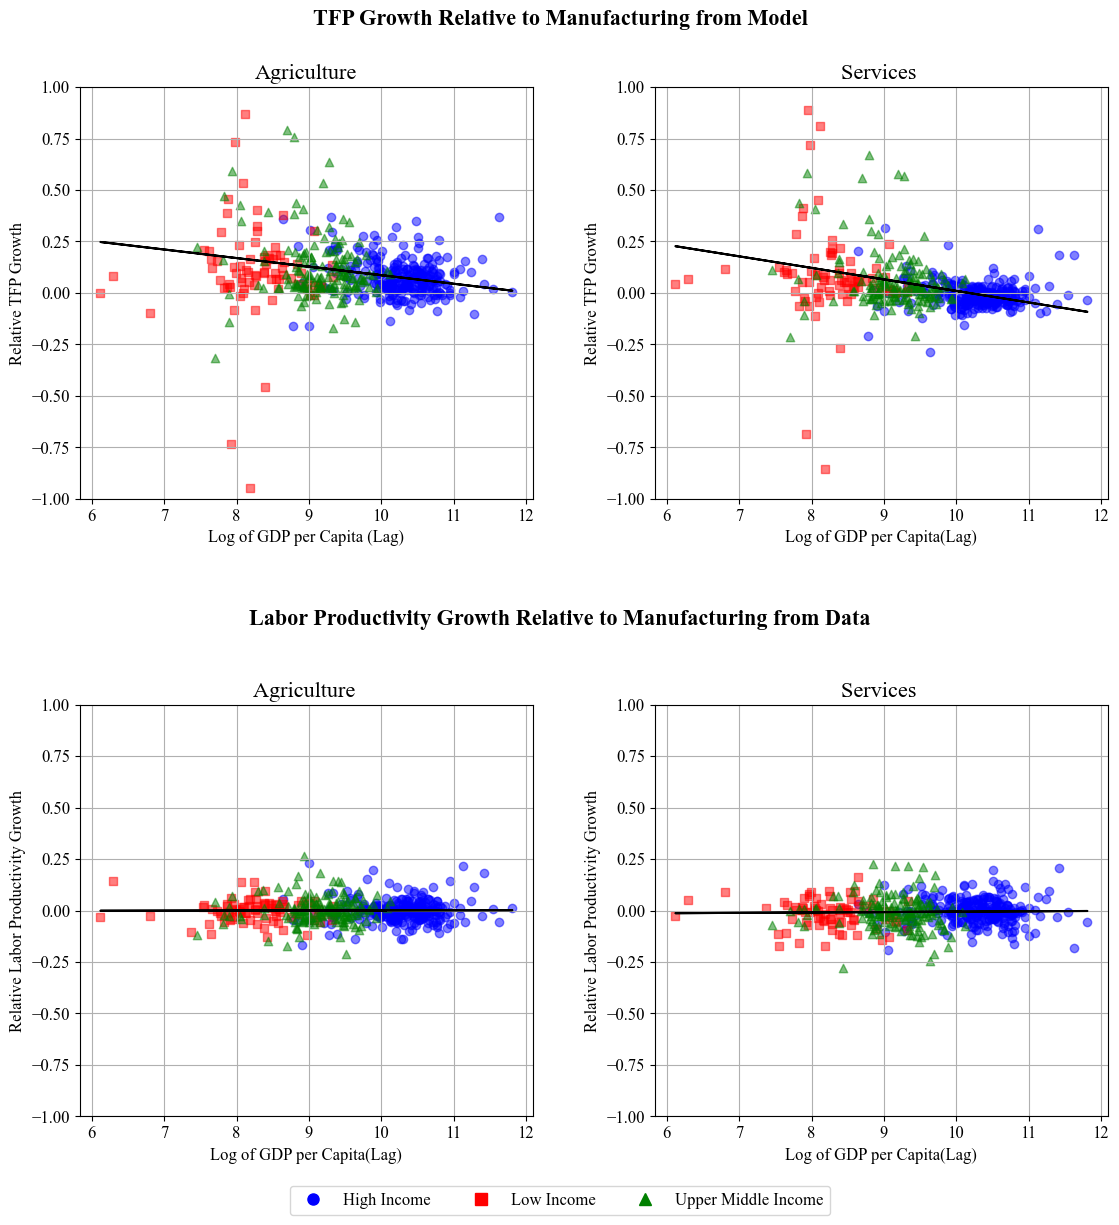

In [723]:
plot_scatter3(df6, 'income_group',
              [[('log_gdp_cap_lag','log_Good1_ratio_T'), ('log_gdp_cap_lag','log_Good2_ratio_T')],
               [('log_gdp_cap_lag','ag_mn_diff'), ('log_gdp_cap_lag','ser_mn_diff')]],
              [['Agriculture', 'Services '],
               ['Agriculture ', 'Services ']],
              [['Log of GDP per Capita (Lag)', 'Log of GDP per Capita(Lag)'],
               ['Log of GDP per Capita(Lag)', 'Log of GDP per Capita(Lag)']],  # X labels
              [['Relative TFP Growth', 'Relative TFP Growth'],
               ['Relative Labor Productivity Growth', 'Relative Labor Productivity Growth']],  # Y labels
              {'HIC': 'High Income', 'LIC': 'Low Income', 'UMI': 'Upper Middle Income'},  # New legend names
              ['TFP Growth Relative to Manufacturing from Model', 'Labor Productivity Growth Relative to Manufacturing from Data']  # Row titles
)

In [724]:
#which country has the highest Good1_a. show country and year
df6.loc[df6['Good1_a'].idxmax(), ['country', 'year', 'Good1_a']]

country    China, Hong Kong SAR
year                     2015.0
Good1_a            44787.992419
Name: 3713, dtype: object

In [725]:
#generate the log of 'Good1_a', 'Good2_a'
df6['log_Good1_a'] = np.log(df6['Good1_a'])
df6['log_Good2_a'] = np.log(df6['Good2_a'])

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/1930304760.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6['log_Good1_a'] = np.log(df6['Good1_a'])
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/1930304760.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df6['log_Good2_a'] = np.log(df6['Good2_a'])


In [726]:
#keep data for only countries that have data starting at 1975
df7 = df6.groupby('country').filter(lambda x: x['year'].min() == 1975)

In [727]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_shares(df, variables, labels, titles):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12
    # Filter data
    #df = df.groupby('country').filter(lambda x: x['year'].min() >= 1980)
    # Create 5-year intervals
    #df = df[df['year'] % 5 == 0]

    # Define the color map, line style map, marker map, and transparency map (alpha values)
    color_map = {'HIC': 'darkblue', 'LIC': 'red', 'UMI': 'green'}
    line_style_map = {'HIC': '-', 'LIC': ':', 'UMI': '--'}
    marker_map = {'HIC': 'o', 'LIC': 's', 'UMI': '^'}  # Circle, Square, Diamond markers
    alpha_map = {'HIC': 0.3, 'LIC': 0.6, 'UMI': 1}
    line_width_map = {'HIC': 1.5, 'LIC': 2.5, 'UMI': 1}

    fig, ax = plt.subplots(2, 2, figsize=(15, 15))
    fig.subplots_adjust(top=0.6, bottom=0.2, hspace=0.3)  # Adjust space for titles

    # Define the panel letters
    panel_letters = ['A', 'B', 'C', 'D']

    for i, (variable, (x_label, y_label, mean_y_label), title) in enumerate(zip(variables, labels, titles)):
        # Add a title for the row
        fig.text(0.5, 1 - (i * 0.50), title, ha='center', va='center', fontsize=20, weight='bold')

        ax[i][0].set_title('Panel ' + panel_letters[2*i], fontsize=18)
        ax[i][1].set_title('Panel ' + panel_letters[2*i + 1], fontsize=18)

        # Plot the employment shares for each country (Panel A)
        pivot_table = df.pivot_table(values=variable, index='year', columns='country')
        for country in pivot_table.columns:
            income_group = df.loc[df['country'] == country, 'income_group'].iloc[0]
            ax[i][0].plot(
                pivot_table.index, pivot_table[country], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        # Plot the mean employment shares for each income group (Panel B)
        grouped_data = df.groupby(['year', 'income_group'])[variable].mean().unstack()
        for income_group in grouped_data.columns:
            ax[i][1].plot(
                grouped_data.index, grouped_data[income_group], 
                color=color_map[income_group],
                linestyle=line_style_map[income_group],
                marker=marker_map[income_group],
                linewidth=line_width_map[income_group],
                alpha=alpha_map[income_group]
            )

        # Label axis
        ax[i][0].set_xlabel(x_label, fontsize=18)
        ax[i][0].set_ylabel(y_label, fontsize=18)
        ax[i][1].set_xlabel(x_label, fontsize=18)
        ax[i][1].set_ylabel(mean_y_label, fontsize=18)
        # Increase the font size of the x and y axis numbering
        ax[i][0].tick_params(axis='both', which='major', labelsize=16)
        ax[i][1].tick_params(axis='both', which='major', labelsize=16)


    # Create custom lines for the legend
    HIC_line = mlines.Line2D([], [], color='darkblue', linestyle='-', marker='o', linewidth=3, alpha=0.5, label='High Income')
    UMI_line = mlines.Line2D([], [], color='green', linestyle='--', marker='^', linewidth=2, alpha=1, label='Middle Income')
    LIC_line = mlines.Line2D([], [], color='red', linestyle=':', marker='s', linewidth=2, alpha=0.8, label='Low Income')


    # Add the legend to the figure at the bottom
    fig.legend(handles=[LIC_line,UMI_line,HIC_line], loc='lower center', ncol=3, fontsize=18, bbox_to_anchor=(0.5, -0.03))

    plt.tight_layout()  # Leave space for the legend and titles
    # Save plot in new folder
    plt.show()

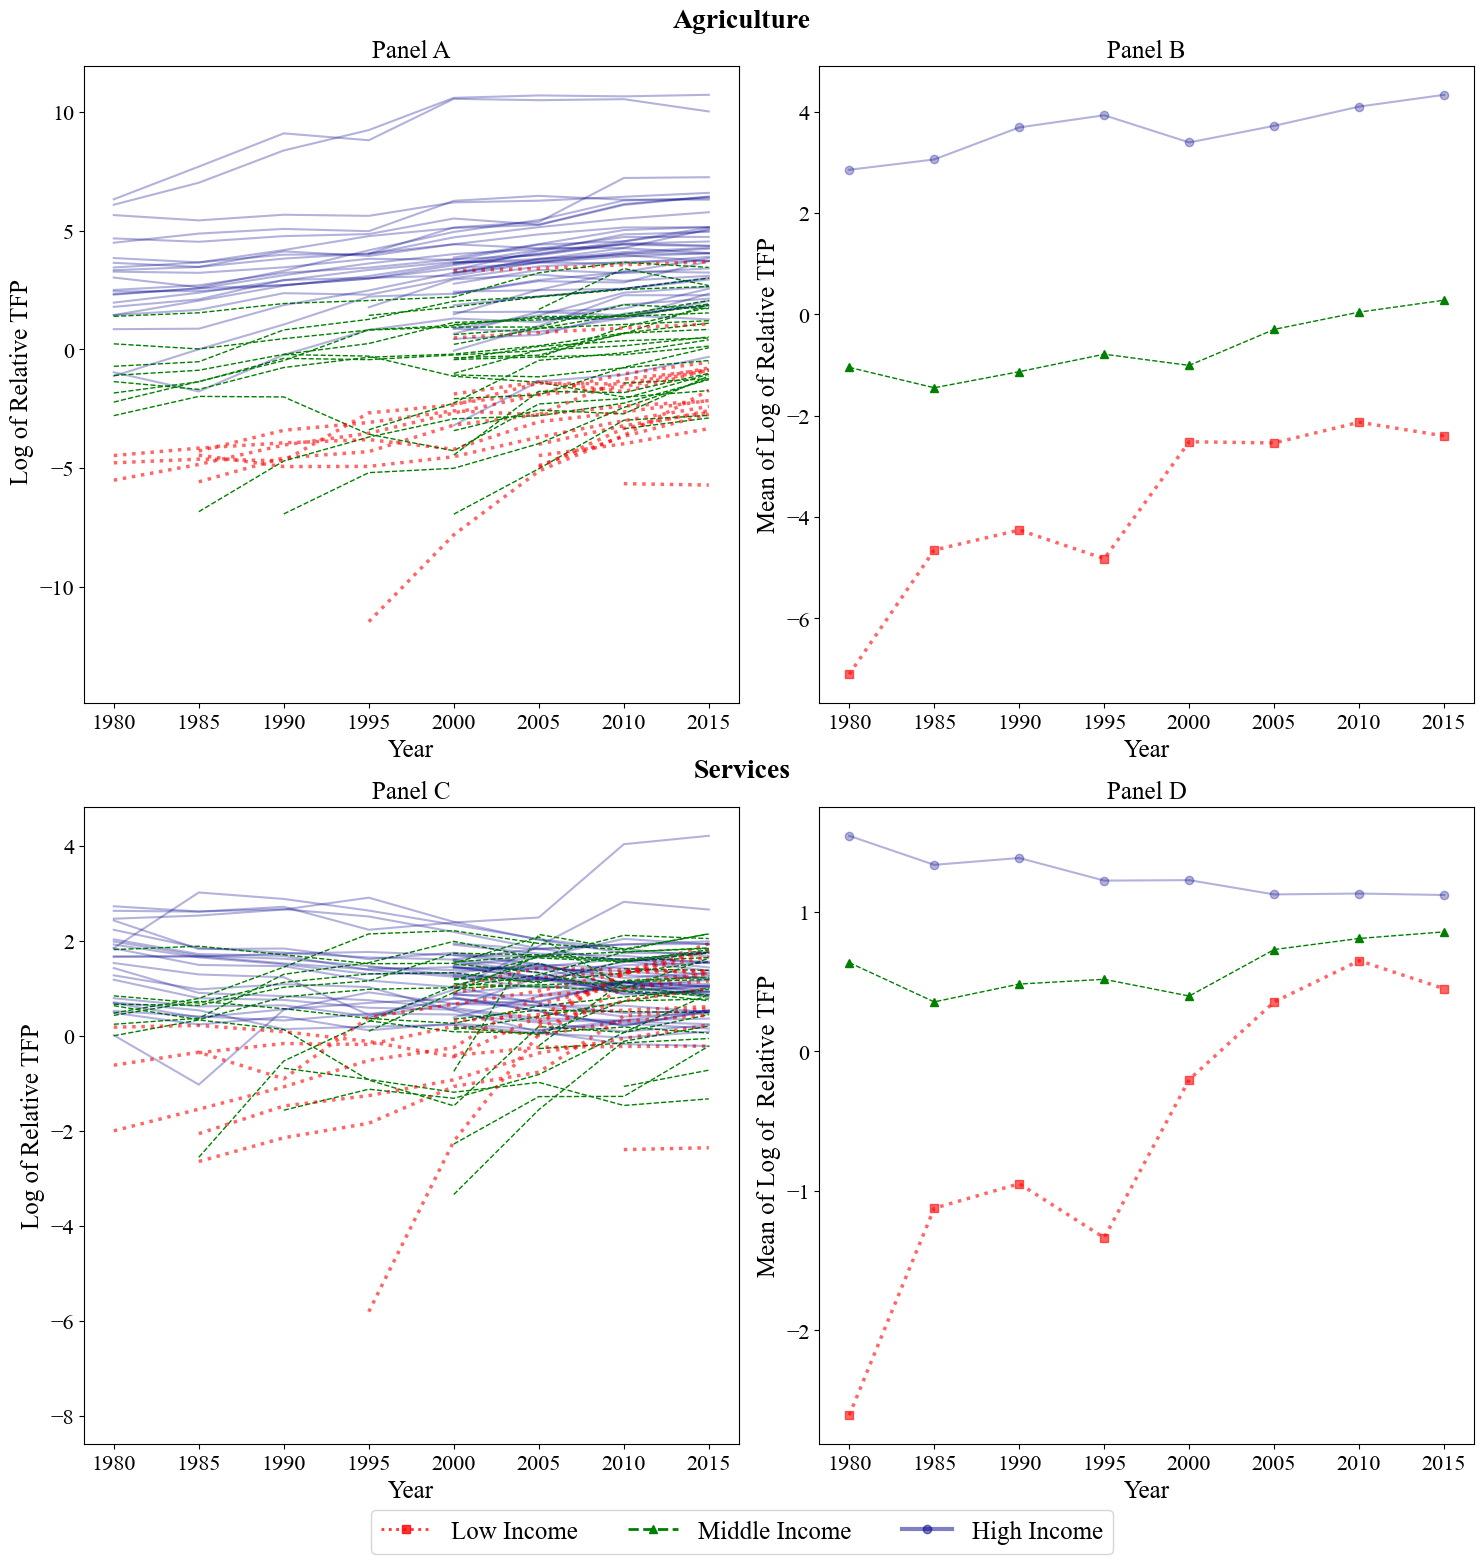

In [728]:
plot_shares(df6, ['log_Good1_a', 'log_Good2_a'], [('Year', ' Log of Relative TFP', 'Mean of Log of Relative TFP'), ('Year', 'Log of Relative TFP', 'Mean of Log of  Relative TFP')], ['Agriculture', 'Services'])

In [729]:
df6.sort_values(['country', 'year'], inplace=True)

In [730]:
#compute gdppc growth
df6['gdp_cap_gr']=df6.groupby('country')['gdp_cap'].pct_change()

In [731]:
#check which country has the highest and lowest values
df6['log_Good2_ratio_T'].describe()

count    496.000000
mean       0.032864
std        0.159948
min       -0.857472
25%       -0.033399
50%        0.004818
75%        0.055590
max        1.391889
Name: log_Good2_ratio_T, dtype: float64

In [732]:
#check the country and year for the highest value
df6[df6['log_Good2_ratio_T']==df6['log_Good2_ratio_T'].max()]

year       country  AGRvareal   MINvareal    MANvareal     UTIvareal  \
3778  2015.0  Sierra Leone  6428287.5  665761.625  254825.1875  24510.630859   

      CONvareal  TRSvareal    TRAvareal   FINvareal  ...  log_Good1_ratio_T  \
3778  196303.25  1127069.5  661538.6875  552191.875  ...           1.325076   

      log_Good2_ratio_T  log_Good0_ratio_T  Good0_lpus_gr  Good1_lpus_gr  \
3778           1.391889                0.0       0.119606       0.137864   

      Good2_lpus_gr  ag_mn_diff  ser_mn_diff  log_Good1_a  log_Good2_a  
3778       0.004085    0.018259    -0.115521    -5.335461     0.915993  

[1 rows x 168 columns]

In [733]:
list(df_final.columns)

['year',
 'country',
 'AGRvareal',
 'MINvareal',
 'MANvareal',
 'UTIvareal',
 'CONvareal',
 'TRSvareal',
 'TRAvareal',
 'FINvareal',
 'OTHvareal',
 'TOTvareal',
 'AGRemp',
 'MINemp',
 'MANemp',
 'UTIemp',
 'CONemp',
 'TRSemp',
 'TRAemp',
 'FINemp',
 'OTHemp',
 'TOTemp',
 'AGRlpreal',
 'MINlpreal',
 'MANlpreal',
 'UTIlpreal',
 'CONlpreal',
 'TRSlpreal',
 'TRAlpreal',
 'FINlpreal',
 'OTHlpreal',
 'TOTlpreal',
 'AGRlppp',
 'MINlppp',
 'MANlppp',
 'UTIlppp',
 'CONlppp',
 'TRSlppp',
 'TRAlppp',
 'FINlppp',
 'OTHlppp',
 'TOTlppp',
 'AGRva',
 'MINva',
 'MANva',
 'UTIva',
 'CONva',
 'TRSva',
 'TRAva',
 'FINva',
 'OTHva',
 'TOTva',
 'region',
 'income_group',
 'xr',
 'pop',
 'rgdpe',
 'rgdpna',
 'pl_gdpo',
 'pl_x',
 'pl_con',
 'cgdpo',
 'delta',
 'labsh',
 'emp',
 'avh',
 'hc',
 'irr',
 'csh_x',
 'csh_m',
 'debt_gdp',
 'net_export',
 'cid',
 'real',
 'xr_pp',
 'AGRvaus',
 'MINvaus',
 'MANvaus',
 'UTIvaus',
 'CONvaus',
 'TRSvaus',
 'TRAvaus',
 'FINvaus',
 'OTHvaus',
 'TOTvaus',
 'AGRlpus',
 'MIN

# Sensitivity Analysis 

1. We add net export as a percentage of GDP to capture exports.

In [734]:
list(df_final.columns)

['year',
 'country',
 'AGRvareal',
 'MINvareal',
 'MANvareal',
 'UTIvareal',
 'CONvareal',
 'TRSvareal',
 'TRAvareal',
 'FINvareal',
 'OTHvareal',
 'TOTvareal',
 'AGRemp',
 'MINemp',
 'MANemp',
 'UTIemp',
 'CONemp',
 'TRSemp',
 'TRAemp',
 'FINemp',
 'OTHemp',
 'TOTemp',
 'AGRlpreal',
 'MINlpreal',
 'MANlpreal',
 'UTIlpreal',
 'CONlpreal',
 'TRSlpreal',
 'TRAlpreal',
 'FINlpreal',
 'OTHlpreal',
 'TOTlpreal',
 'AGRlppp',
 'MINlppp',
 'MANlppp',
 'UTIlppp',
 'CONlppp',
 'TRSlppp',
 'TRAlppp',
 'FINlppp',
 'OTHlppp',
 'TOTlppp',
 'AGRva',
 'MINva',
 'MANva',
 'UTIva',
 'CONva',
 'TRSva',
 'TRAva',
 'FINva',
 'OTHva',
 'TOTva',
 'region',
 'income_group',
 'xr',
 'pop',
 'rgdpe',
 'rgdpna',
 'pl_gdpo',
 'pl_x',
 'pl_con',
 'cgdpo',
 'delta',
 'labsh',
 'emp',
 'avh',
 'hc',
 'irr',
 'csh_x',
 'csh_m',
 'debt_gdp',
 'net_export',
 'cid',
 'real',
 'xr_pp',
 'AGRvaus',
 'MINvaus',
 'MANvaus',
 'UTIvaus',
 'CONvaus',
 'TRSvaus',
 'TRAvaus',
 'FINvaus',
 'OTHvaus',
 'TOTvaus',
 'AGRlpus',
 'MIN

In [735]:
df_final['net_exp']=df_final['csh_x']+df_final['csh_m']

In [736]:
df_final.groupby('income_group')['net_exp'].describe()

count      mean       std       min       25%       50%  \
income_group                                                             
HIC           1598.0 -0.034700  0.144125 -0.655553 -0.077822 -0.023690   
LIC           1252.0 -0.057780  0.119851 -0.838085 -0.088327 -0.042392   
UMI           1154.0 -0.055878  0.125411 -0.835931 -0.096639 -0.024918   

                   75%       max  
income_group                      
HIC           0.022303  0.528139  
LIC          -0.008554  0.621831  
UMI           0.008469  0.757552

In [737]:
#generate a new variable equal to the average of net exports by country
# Assuming df is your DataFrame and 'country' and 'net_exports' are columns in df
df_final['average_net_exports'] = df_final.groupby('country')['net_exp'].transform('mean')

In [738]:
#sort data
df_final.sort_values(['country', 'year'], inplace=True)

In [739]:
df_final.groupby('income_group')['average_net_exports'].describe()

count      mean       std       min       25%       50%  \
income_group                                                             
HIC           1598.0 -0.034700  0.119596 -0.412088 -0.072271 -0.020074   
LIC           1252.0 -0.057780  0.102629 -0.374091 -0.072806 -0.044027   
UMI           1154.0 -0.055878  0.102806 -0.404206 -0.101958 -0.027324   

                   75%       max  
income_group                      
HIC           0.013230  0.354173  
LIC          -0.015201  0.363112  
UMI          -0.001376  0.165001

In [740]:
import pandas as pd
from IPython.display import display

# Set the maximum number of rows to display to None, which means display all rows
pd.set_option('display.max_rows', None)

# Print each country with its average_net_exports
df_unique = df_final.drop_duplicates(subset='country')

# Display the DataFrame as a table
display(df_unique[['country', 'average_net_exports']])

country  average_net_exports
2063                         Algeria             0.090690
2358                          Angola             0.363112
1320                       Argentina             0.015307
491                        Australia             0.013230
251                          Austria            -0.072271
2260                      Azerbaijan             0.165001
1385                      Bangladesh            -0.023727
493                          Belgium            -0.045233
1387                          Belize            -0.156615
1388                         Bolivia            -0.021851
122                         Botswana            -0.064398
253                           Brazil            -0.002939
1694                        Bulgaria            -0.100702
254                     Burkina Faso            -0.056933
142                         Cameroon            -0.008552
256                           Canada             0.022790
4                              Chile            -0.009640
10                             China             0.012205
449             China, Hong Kong SAR             0.078359
0                           Colombia            -0.001376
1                         Costa Rica            -0.070008
1703                         Croatia            -0.205071
1704                          Cyprus            -0.412088
1547                  Czech Republic            -0.025074
261                          Denmark            -0.015016
1400              Dominican Republic            -0.070489
1401                         Ecuador             0.006078
61                             Egypt            -0.064326
1710                         Estonia            -0.083598
1403                        Eswatini            -0.014096
77                          Ethiopia            -0.050485
615                             Fiji            -0.184739
507                          Finland             0.003146
264                           France            -0.027095
2493                         Georgia            -0.192602
265                          Germany             0.007374
62                             Ghana            -0.015201
1718                          Greece            -0.182909
2292                       Guatemala            -0.124108
1410                        Honduras            -0.142785
1720                         Hungary            -0.052920
1637                         Iceland            -0.108621
63                             India            -0.012220
313                        Indonesia             0.063084
1413                            Iran             0.050686
1725                         Ireland             0.262977
268                            Italy            -0.012742
1564                         Jamaica            -0.211271
411                            Japan             0.022048
1489                          Jordan            -0.263035
238                            Kenya            -0.072806
1347            Lao People's Dem Rep            -0.050703
1732                          Latvia            -0.167450
270                          Lesotho            -0.374091
1734                       Lithuania            -0.103853
271                       Luxembourg            -0.361890
172                           Malawi            -0.044027
519                         Malaysia             0.049722
273                        Mauritius            -0.102920
2                             Mexico            -0.017516
275                         Mongolia            -0.012495
2216                      Montenegro            -0.307782
276                          Morocco            -0.090620
277                       Mozambique            -0.252540
65                           Namibia            -0.075205
2319                           Nepal            -0.086201
279                      Netherlands             0.034541
1359                     New Zealand            -0.020074
66                         

In [741]:
# Filter the DataFrame to include only rows where average_net_exports is positive
positive_exports = df_unique[df_unique['average_net_exports'] > 0]

# Count the number of countries with positive average net_exports
num_countries_positive_exports = positive_exports['country'].count()

print(f"Number of countries with positive average net exports: {num_countries_positive_exports}")

# Group by 'income_group' and count the number of countries in each group
grouped = positive_exports.groupby('income_group')['country'].count()

# Print the number of countries with positive average net exports in each income group
print(grouped)

Number of countries with positive average net exports: 25
income_group
HIC    14
LIC     3
UMI     8
Name: country, dtype: int64


In [742]:
# Filter the DataFrame to include only rows where average_net_exports is positive
negative_exports = df_unique[df_unique['average_net_exports'] < 0]

# Count the number of countries with positive average net_exports
num_countries_negative_exports= negative_exports['country'].count()

print(f"Number of countries with positive average net exports: {num_countries_negative_exports}")

# Group by 'income_group' and count the number of countries in each group
grouped = negative_exports.groupby('income_group')['country'].count()

# Print the number of countries with positive average net exports in each income group
print(grouped)

Number of countries with positive average net exports: 78
income_group
HIC    29
LIC    27
UMI    22
Name: country, dtype: int64


In [763]:
theta=0.32
beta=0.17
delta=1
eps=0.3
om1=0.1
om0=0.15
#gamma_0=0.02
#gamma_n=0.01
om2=1-om1-om0
const=0
year_min=1975
year_max=2017

In [764]:

def compute_values4(df, theta, beta,eps,om0,om1,om2,delta, const, year_min, year_max):
    #val=(1+ gamma_0)*(1+gamma_n)*beta*theta

    #keep only data starting from year_min and ending year_max
    df = df[(df['year'] >= year_min) & (df['year'] <= year_max)]
    df = df.groupby('country').filter(lambda x: x['year'].min() == year_min and x['year'].max() == year_max)
    val= beta*theta-df['average_net_exports']
     #drop if Good_0empshare is less than val
    df=df.drop(df[df['Good_0empshare']<val].index)
    #create a time variable
    df['time'] = df.groupby('country')['year'].transform(lambda x: x - x.min())
    years=[year_min,year_max]
    df=df[df['year'].isin(years)]
    df['X_t']=(1-val)/(df['Good_0empshare']-val)

    #computing the x_it values
    df['x_1t']=df['Good_1empshare']/(df['Good_0empshare']- val)
   
    df['x_2t']=df['Good_2empshare']/(df['Good_0empshare']-val)
    

    df['x_0t']=1
    df['sum']=df['x_0t']+df['x_1t']+df['x_2t']
    df['diff']=df['sum']-df['X_t']

    #computing the a_it values
    Q=1/((1-eps)*(1-theta))
    df['Good1_a']= (om1/om0)**(eps*Q) /df['x_1t']**(Q)
    df['Good2_a']= (om2/om0)**(eps*Q) /df['x_2t']**(Q)
    df['Good0_a']= (om0/om0)**(eps*Q) /df['x_0t']**(Q)
    #by country compute the ratio of the values
    df['Good1_ratio'] = df.groupby('country')['Good1_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    df['Good2_ratio'] = df.groupby('country')['Good2_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    df['Good0_ratio'] = df.groupby('country')['Good0_a'].transform(lambda x: x.iloc[-1] / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    
    #compute the log of the values
    df['log_Good1_ratio']=np.log(df['Good1_ratio'])
    df['log_Good2_ratio']=np.log(df['Good2_ratio'])
    df['log_Good0_ratio']=np.log(df['Good0_ratio'])
        #creating t_inverse
    df['t_inverse'] = df[df['year'] == 2017].groupby('country')['time'].transform(lambda x: 1 / x.iloc[0] if len(x) > 0 and x.iloc[0] != 0 else np.nan)
    #multiply by the values by ther inverse of the end period time value
    df['log_Good1_ratio_T']= df['log_Good1_ratio']* df['t_inverse']
    df['log_Good2_ratio_T']= df['log_Good2_ratio']*df['t_inverse']
    df['log_Good0_ratio_T']=df['log_Good0_ratio']* df['t_inverse']
    return df


In [765]:
df7=compute_values4(df_final, theta, beta,eps,om0,om1,om2,delta, const, year_min, year_max)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3943879359.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good1_a']= (om1/om0)**(eps*Q) /df['x_1t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3943879359.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good2_a']= (om2/om0)**(eps*Q) /df['x_2t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3943879359.py:30: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [766]:
# Map these values to a new column in the original DataFrame
df7['log_gdp_cap_1975'] = df7['country'].map(df_1975)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/1763546220.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df7['log_gdp_cap_1975'] = df7['country'].map(df_1975)


In [767]:

df2_2017=df7[df7['year']==2017]


In [768]:
#count number of observations
df2_2017['log_Good1_ratio_T'].count()

52

In [769]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'UMI': 'green', 'LIC': 'red'}  # Changed order
    group_markers = {'HIC': 'o', 'UMI': '^', 'LIC': 's'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=None)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)
        axs[i].grid(True)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()


Plot (a):
Coefficient: -0.00
T-statistic: -0.49
P-value: 0.6258

Plot (b):
Coefficient: -0.02
T-statistic: -6.15
P-value: 0.0000



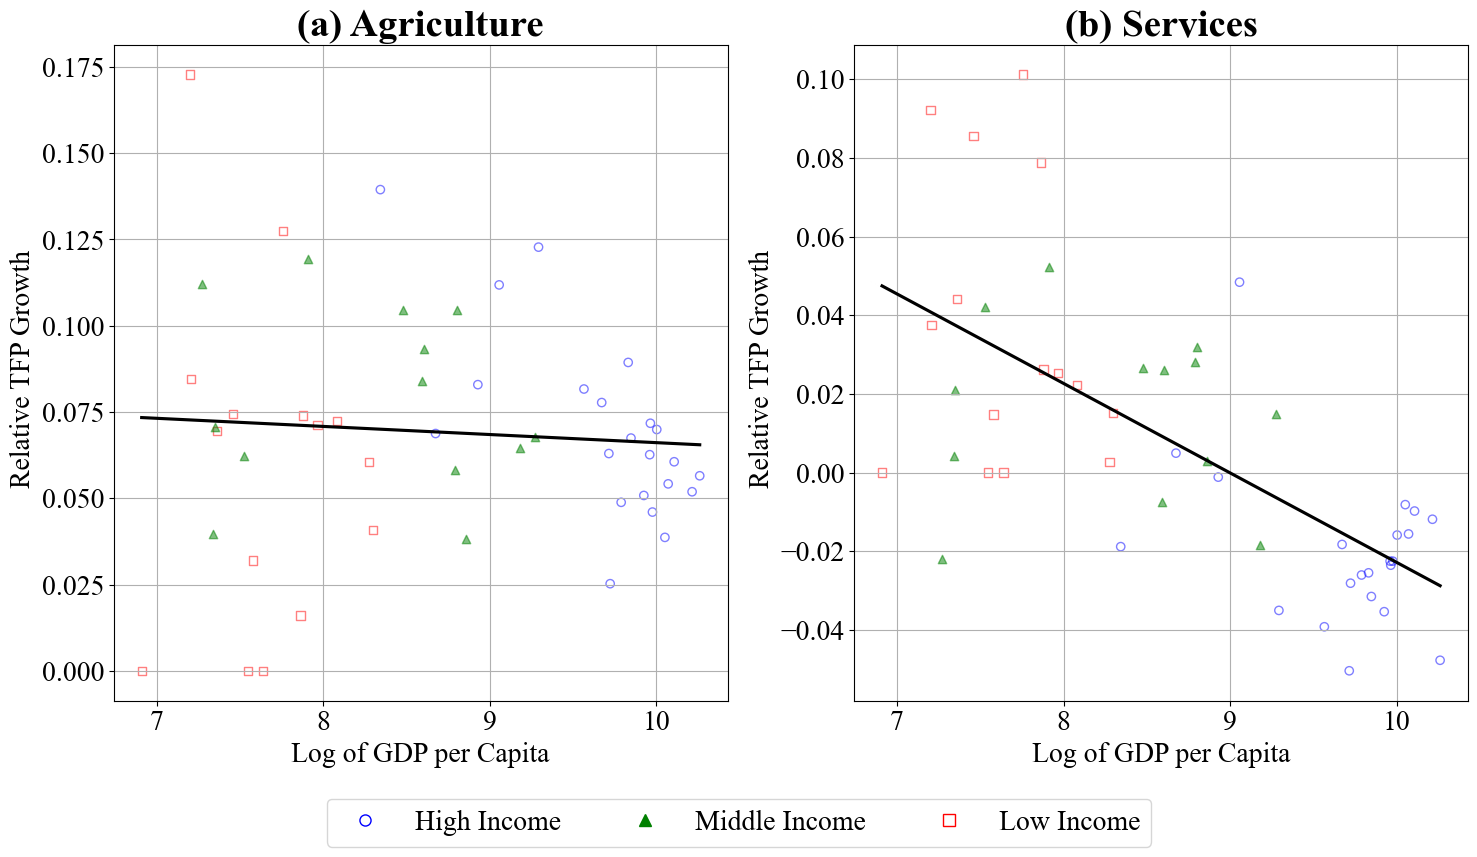

In [770]:
plot_scatter2(
    df2_2017,  # Data
    [('log_gdp_cap_1975','log_Good1_ratio_T'), ('log_gdp_cap_1975','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture', 'Services'],  # Titles
    ['Log of GDP per Capita','Log of GDP per Capita'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)

In [751]:
# list countries
df2_2017['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Botswana', 'Brazil',
       'Burkina Faso', 'Cameroon', 'Canada', 'Chile', 'China',
       'China, Hong Kong SAR', 'Colombia', 'Costa Rica', 'Denmark',
       'Egypt', 'Ethiopia', 'Finland', 'France', 'Germany', 'Ghana',
       'India', 'Indonesia', 'Italy', 'Japan', 'Kenya', 'Luxembourg',
       'Malawi', 'Malaysia', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco',
       'Namibia', 'Netherlands', 'Nigeria', 'Norway', 'Pakistan',
       'Philippines', 'Republic of Korea', 'Rwanda', 'Senegal',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden',
       'Taiwan', 'Thailand', 'United Kingdom',
       'United Republic of Tanzania', 'United States', 'Zambia'],
      dtype=object)

In [752]:
df_2017['country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Botswana', 'Brazil',
       'Burkina Faso', 'Cameroon', 'Canada', 'Chile', 'China',
       'China, Hong Kong SAR', 'Colombia', 'Costa Rica', 'Denmark',
       'Egypt', 'Finland', 'France', 'Germany', 'Ghana', 'India',
       'Indonesia', 'Italy', 'Japan', 'Kenya', 'Lesotho', 'Luxembourg',
       'Malawi', 'Malaysia', 'Mauritius', 'Mexico', 'Mongolia', 'Morocco',
       'Mozambique', 'Namibia', 'Netherlands', 'Nigeria', 'Norway',
       'Pakistan', 'Philippines', 'Republic of Korea', 'Senegal',
       'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden',
       'Taiwan', 'Thailand', 'United Kingdom',
       'United Republic of Tanzania', 'United States', 'Zambia'],
      dtype=object)

In [753]:
theta=0.32
beta=0.816
delta=0.1
delta_n=(1- delta)**5
eps=0.3
om1=0.1
om0=0.25
gamma_0=0.02
gamma_0n=(1+gamma_0)**5
gamma_n=0.01
gamma_n2=(1+ gamma_n)**5
om2=1-om1-om0
const=0
year_min=1975
year_max=2017

In [754]:

#compute non-overlaping 5-year averages of net exports
def non_overlapping_average(series, window_size):
    # Calculate the number of complete windows
    num_windows = len(series) // window_size
    # Initialize an array to store the averages
    averages = np.full(len(series), np.nan)
    
    for i in range(num_windows):
        start_idx = i * window_size
        end_idx = start_idx + window_size
        window_avg = series[start_idx:end_idx].mean()
        averages[start_idx:end_idx] = window_avg
    
    return averages

#df_final['average_net_exports2'] = df_final.groupby('country')['net_exp'].transform(lambda x: non_overlapping_average(x, 5))

In [755]:
df_final.groupby('income_group')['average_net_exports2'].describe()

KeyError: 'Column not found: average_net_exports2'

In [ ]:
##compute 5-year nonoverlaping averageges of net exports
df_final['net_exp']=df_final['csh_x']+df_final['csh_m']
df_final['average_net_exports'] = df_final.groupby('country')['net_exp'].transform(lambda x: x.rolling(5).mean().shift(-4))

In [ ]:
def compute_values3(df, theta, beta, eps, om0, om1, om2, delta,delta_n,gamma_0n,gamma_n2, const):
    # Set the minimum year to 1975
    year_min = 1975

    # Filter data within the year range and ensure full coverage
    df = df[df['year'] >= year_min]
    df = df.groupby('country').filter(lambda x: x['year'].min() >= year_min)
    #compute non-overlaping 5-year averages of net exports
    df['av_net_exp'] = df_final.groupby('country')['net_exp'].transform(lambda x: non_overlapping_average(x, 5))

    # Create a time variable
    df['time'] = 5
    df = df[df['year'] % 5 == 0]  # Keep only years that are multiples of 5
    val=((gamma_0n)*(gamma_n2)-(delta_n))*beta*theta 
    den=1-beta*(delta_n)
    sen=val/den
    #df['Q_t']=df.groupby('country')['net_export'].transform('mean')
    # Calculate X_t for all years, with checks for invalid values
    df['X_t'] = np.where(df['Good_0empshare'] - sen-df['av_net_exp'] > const, 
                         (1-sen - df['av_net_exp'])/(df['Good_0empshare']-sen- df['av_net_exp']), 
                         np.nan)

    # Calculate x_1t and x_2t for all years with a condition check
    valid_condition = (df['Good_0empshare'] - sen - df['av_net_exp'] > const)
    df['x_1t'] = np.where(valid_condition, df['Good_1empshare'] / (df['Good_0empshare'] - sen- df['av_net_exp']), np.nan)
    df['x_2t'] = np.where(valid_condition, df['Good_2empshare'] / (df['Good_0empshare'] - sen- df['av_net_exp']), np.nan)

    # Define x_0t for all years
    df['x_0t'] = 1

    # Compute sum and difference for all years
    df['sum'] = df['x_0t'] + df['x_1t'] + df['x_2t']
    df['diff'] = df['sum'] - df['X_t']

    # Compute the Q value
    Q = 1 / ((1 - eps) * (1 - theta))

    # Compute the a_it values for each year
    df['Good1_a'] = (om1 / om0)**(eps * Q) / df['x_1t']**(Q)
    df['Good2_a'] = (om2 / om0)**(eps * Q) / df['x_2t']**(Q)
    df['Good0_a'] = (om0 / om0)**(eps * Q) / df['x_0t']**(Q)

    # By country, compute the ratio of values between each year and the first year
    df['Good1_ratio'] = df.groupby('country')['Good1_a'].transform(lambda x: x / x.shift(1))
    df['Good2_ratio'] = df.groupby('country')['Good2_a'].transform(lambda x: x / x.shift(1))
    df['Good0_ratio'] = df.groupby('country')['Good0_a'].transform(lambda x: x / x.shift(1))

    # Compute the log of the ratios
    df['log_Good1_ratio'] = np.log(df['Good1_ratio'])
    df['log_Good2_ratio'] = np.log(df['Good2_ratio'])
    df['log_Good0_ratio'] = np.log(df['Good0_ratio'])

    # Create t_inverse for each year
    df['t_inverse'] = df['time'].replace(0, np.nan).apply(lambda x: 1 / x if pd.notnull(x) else np.nan)

    # Multiply the log values by the inverse of the time value for each year
    df['log_Good1_ratio_T'] = df['log_Good1_ratio'] * df['t_inverse']
    df['log_Good2_ratio_T'] = df['log_Good2_ratio'] * df['t_inverse']
    df['log_Good0_ratio_T'] = df['log_Good0_ratio'] * df['t_inverse']

    return df

In [ ]:
df8=compute_values3(df_final, theta, beta,eps,om0,om1,om2,delta,delta_n,gamma_0n,gamma_n2, const)

/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3162648991.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['diff'] = df['sum'] - df['X_t']
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3162648991.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Good1_a'] = (om1 / om0)**(eps * Q) / df['x_1t']**(Q)
/var/folders/41/vdz4x2j921n9ntzc1tjpm92h0000gn/T/ipykernel_51173/3162648991.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.ins

In [ ]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

def plot_scatter2(df, column_pairs, titles, x_labels, y_labels):
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 14

    # Define the color and marker for each group
    group_colors = {'HIC': 'blue', 'UMI': 'green', 'LIC': 'red'}  # Changed order
    group_markers = {'HIC': 'o', 'UMI': '^', 'LIC': 's'}  # Changed order

    # Define the new labels for each group
    group_labels = {'LIC': 'Low Income', 'UMI': 'Middle Income', 'HIC': 'High Income'}  # Changed order

    n = len(column_pairs)
    fig, axs = plt.subplots(1, 2, figsize=(15, 8))  # Change to a 1 by 2 orientation

    # Define the panel letters
    panel_letters = ['(a)', '(b)']

    for i in range(n):
        column1, column2 = column_pairs[i]
        title = titles[i]
        x_label = x_labels[i]
        y_label = y_labels[i]

        # Drop rows with missing values in the relevant columns
        df_clean = df[[column1, column2, 'income_group']].dropna()

        groups = df_clean.groupby('income_group')

        for name, group in groups:
            facecolor = 'none' if name in ['HIC', 'LIC'] else group_colors[name]
            axs[i].scatter(group[column1], group[column2], alpha=0.5, 
                           facecolors=facecolor, edgecolors=group_colors[name], marker=group_markers[name],
                           label=group_labels[name])  # Use the new label

        # Calculate the line of best fit for all data, not just within groups
        X = sm.add_constant(df_clean[column1])  # Add a constant to the model
        model = sm.OLS(df_clean[column2], X)
        results = model.fit()

        # Plot the regression line with 95% confidence interval
        sns.regplot(x=column1, y=column2, data=df_clean, scatter=False, ax=axs[i], color='black', ci=None)

        # Add the panel letter to the title
        axs[i].set_title(panel_letters[i] + ' ' + title, fontsize=28, weight='bold')
        axs[i].set_xlabel(x_label, fontsize=20)
        axs[i].set_ylabel(y_label, fontsize=20)
        axs[i].grid(True)

        # Increase the font size of the x and y axis numbering
        axs[i].tick_params(axis='x', labelsize=20)
        axs[i].tick_params(axis='y', labelsize=20)
        #set y-axis limits
        axs[i].set_ylim(-1, 1)

        # Print coefficient, t-statistic, and p-value
        coef = results.params[column1]
        t_stat = results.tvalues[column1]
        p_value = results.pvalues[column1]
        print(f'Plot {panel_letters[i]}:')
        print(f'Coefficient: {coef:.2f}')
        print(f'T-statistic: {t_stat:.2f}')
        print(f'P-value: {p_value:.4f}\n')

    # Create a legend for the whole figure
    lines = [mlines.Line2D([], [], color=group_colors[name], marker=group_markers[name], markersize=8, label=group_labels[name], linestyle='None', markerfacecolor='none' if name in ['HIC', 'LIC'] else group_colors[name]) for name in group_colors.keys()]  # Use the new label for the legend
    fig.legend(handles=lines, loc='lower center', ncol=len(group_colors), bbox_to_anchor=(0.5, -0.09), fontsize=20)  # Adjust the bbox_to_anchor parameter

    plt.tight_layout()  # Increase the padding
    plt.show()


Plot (a):
Coefficient: -0.03
T-statistic: -2.54
P-value: 0.0116

Plot (b):
Coefficient: -0.05
T-statistic: -4.73
P-value: 0.0000



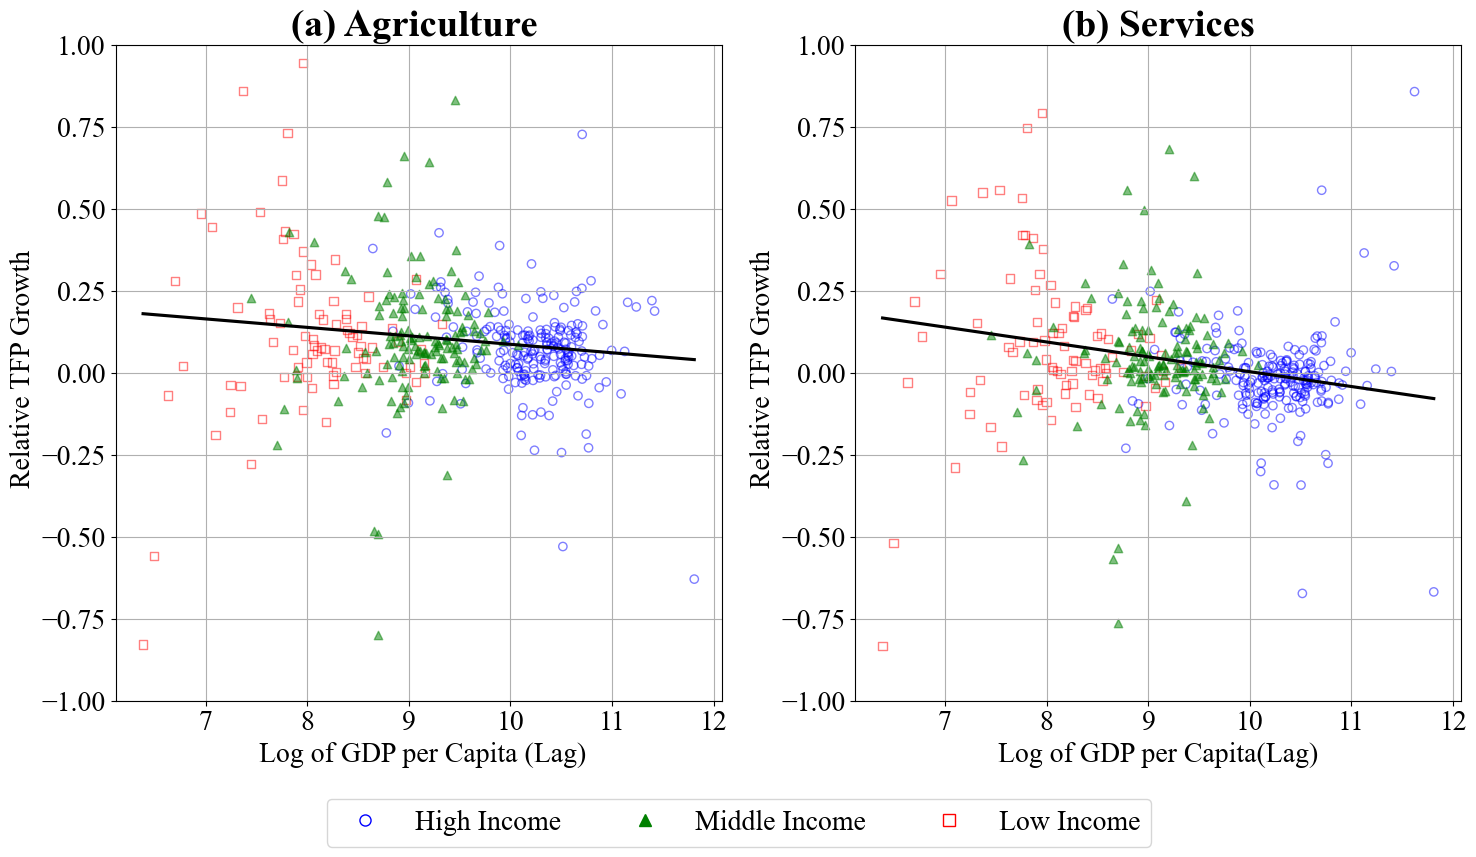

In [ ]:
#plot a scatter plot of the ratios with the log of GDP per capita
plot_scatter2(
    df8,  # Data
    [('log_gdp_cap_lag','log_Good1_ratio_T'),('log_gdp_cap_lag','log_Good2_ratio_T')],  # Pairs of variables
    ['Agriculture ', 'Services'],  # Titles
    [' Log of GDP per Capita (Lag)','Log of GDP per Capita(Lag)'],  # X labels
    [' Relative TFP Growth', ' Relative TFP Growth'],  # Y labels
)


In [ ]:
#count the number of unique countries
df8['log_Good1_ratio_T'].count()

451

In [ ]:
df6['log_Good1_ratio_T'].count()

496

In [ ]:
#plot_shares2(df2, ['agr_man_ratio','ser_man_ratio'],
 #            [('Year', 'Agricultural-Manufacturing Labor Productivity Ratio', 'Mean of Agricultural-Manufacturing Labor Productivity Ratio'),('Year', 'Services-Manufacturing Labor Productivity Ratio','Mean Services-Manufacturing Labor Productivity Ratio')],
 #               ['Agricultural-Manufacturing Labor Productivity Ratio', 'Services-Manufacturing Labor Productivity Ratio'])

In [ ]:
df6['log_Good1_a']=np.log(df6['Good1_a'])
df6['log_Good2_a']=np.log(df6['Good2_a'])

KeyError: 'ag_mn_ratio'

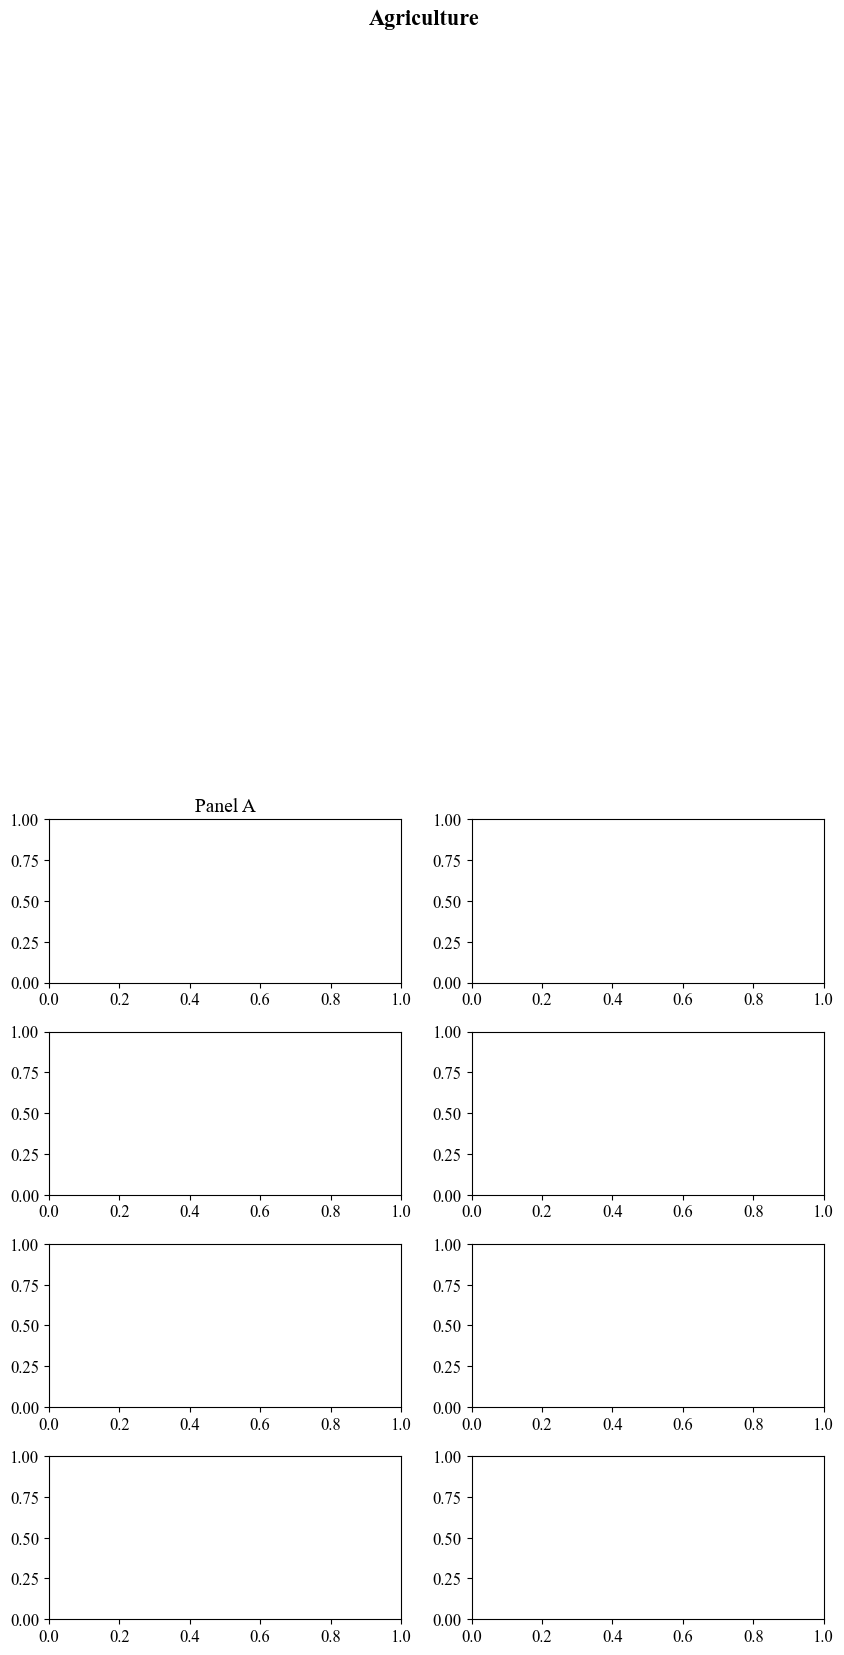

In [ ]:
plot_shares2(df6, ['ag_mn_ratio', 'ser_mn_ratio'],
             [('Year', 'Log of Relative TFP', 'Mean of Log of Relative TFP'),('Year', 'Log of Relative TFP', 'Mean of Log of Relative TFP')],
                ['Agriculture', 'Services'])

KeyError: 'ag_mn_ratio'

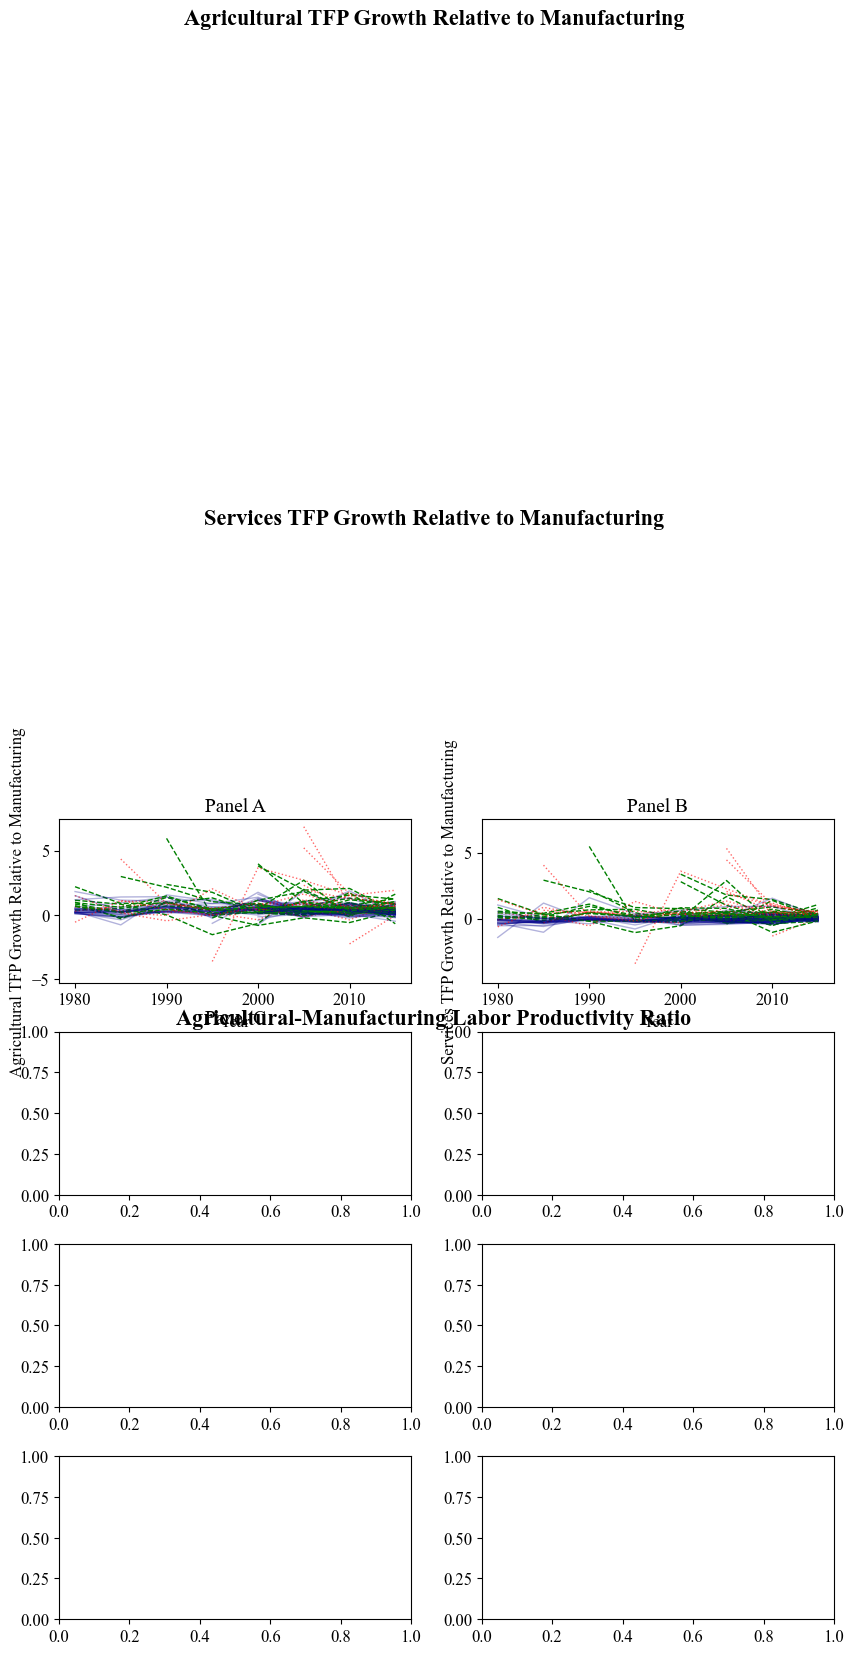

In [ ]:
plot_shares2(df6, ['log_Good1_ratio', 'log_Good2_ratio', 'ag_mn_ratio', 'ser_mn_ratio'],
            [('Year', 'Agricultural TFP Growth Relative to Manufacturing', 'Mean of Agricultural TFP Growth Relative to Manufacturing'),
             ('Year', 'Services TFP Growth Relative to Manufacturing', 'Mean of Services TFP Growth Relative to Manufacturing'),
             ('Year', 'Agricultural-Manufacturing Labor Productivity Ratio', 'Mean of Agricultural-Manufacturing Labor Productivity Ratio'),
             ('Year', 'Services-Manufacturing Labor Productivity Ratio', 'Mean of Services-Manufacturing Labor Productivity Ratio')],
            ['Agricultural TFP Growth Relative to Manufacturing', 
             'Services TFP Growth Relative to Manufacturing', 
             'Agricultural-Manufacturing Labor Productivity Ratio', 
             'Services-Manufacturing Labor Productivity Ratio'])

In [ ]:
list(df_final.columns)

['year',
 'country',
 'AGRvareal',
 'MINvareal',
 'MANvareal',
 'UTIvareal',
 'CONvareal',
 'TRSvareal',
 'TRAvareal',
 'FINvareal',
 'OTHvareal',
 'TOTvareal',
 'AGRemp',
 'MINemp',
 'MANemp',
 'UTIemp',
 'CONemp',
 'TRSemp',
 'TRAemp',
 'FINemp',
 'OTHemp',
 'TOTemp',
 'AGRlpreal',
 'MINlpreal',
 'MANlpreal',
 'UTIlpreal',
 'CONlpreal',
 'TRSlpreal',
 'TRAlpreal',
 'FINlpreal',
 'OTHlpreal',
 'TOTlpreal',
 'AGRlppp',
 'MINlppp',
 'MANlppp',
 'UTIlppp',
 'CONlppp',
 'TRSlppp',
 'TRAlppp',
 'FINlppp',
 'OTHlppp',
 'TOTlppp',
 'AGRva',
 'MINva',
 'MANva',
 'UTIva',
 'CONva',
 'TRSva',
 'TRAva',
 'FINva',
 'OTHva',
 'TOTva',
 'region',
 'income_group',
 'xr',
 'pop',
 'rgdpe',
 'rgdpna',
 'pl_gdpo',
 'pl_x',
 'pl_con',
 'cgdpo',
 'delta',
 'labsh',
 'emp',
 'avh',
 'hc',
 'irr',
 'csh_x',
 'csh_m',
 'debt_gdp',
 'net_export',
 'cid',
 'real',
 'xr_pp',
 'AGRvaus',
 'MINvaus',
 'MANvaus',
 'UTIvaus',
 'CONvaus',
 'TRSvaus',
 'TRAvaus',
 'FINvaus',
 'OTHvaus',
 'TOTvaus',
 'AGRlpus',
 'MIN

In [ ]:
# List of variables for which to find the lower and upper decile values
variables = ['Good_0empshare', 'Good_1empshare', 'Good_2empshare']

# Dictionary to store the decile values for each variable
decile_values = {}

for var in variables:
    lower_decile = df_final[var].quantile(0.1)
    upper_decile = df_final[var].quantile(0.9)
    decile_values[var] = {'lower_decile': lower_decile, 'upper_decile': upper_decile}

# Print the decile values for each variable
for var, deciles in decile_values.items():
    print(f"{var} - Lower decile (10th percentile): {deciles['lower_decile']}")
    print(f"{var} - Upper decile (90th percentile): {deciles['upper_decile']}")

Good_0empshare - Lower decile (10th percentile): 0.1631967818928324
Good_0empshare - Upper decile (90th percentile): 0.6926925628003264
Good_1empshare - Lower decile (10th percentile): 0.032862667305353734
Good_1empshare - Upper decile (90th percentile): 0.7436770238095377
Good_2empshare - Lower decile (10th percentile): 0.0719924824907619
Good_2empshare - Upper decile (90th percentile): 0.331398878574716


In [ ]:
# List of variables for which to find the lower and upper decile values
variables = ['Good_0vashare', 'Good_1vashare', 'Good_2vashare']

# Dictionary to store the decile values for each variable
decile_values = {}

for var in variables:
    lower_decile = df_final[var].quantile(0.1)
    upper_decile = df_final[var].quantile(0.9)
    decile_values[var] = {'lower_decile': lower_decile, 'upper_decile': upper_decile}

# Print the decile values for each variable
for var, deciles in decile_values.items():
    print(f"{var} - Lower decile (10th percentile): {deciles['lower_decile']}")
    print(f"{var} - Upper decile (90th percentile): {deciles['upper_decile']}")

Good_0vashare - Lower decile (10th percentile): 0.5160505771636963
Good_0vashare - Upper decile (90th percentile): 0.7906081676483154
Good_1vashare - Lower decile (10th percentile): 0.012366182170808315
Good_1vashare - Upper decile (90th percentile): 0.33156120777130127
Good_2vashare - Lower decile (10th percentile): 0.10332325100898743
Good_2vashare - Upper decile (90th percentile): 0.2829984426498413


In [ ]:
df_final

In [ ]:
# List of variables for which to find the average values corresponding with the lowest and highest decile of GDP per capita
variables = ['Good_0empshare', 'Good_1empshare', 'Good_2empshare', 'Good_0vashare', 'Good_1vashare', 'Good_2vashare']

# Calculate the 10th and 90th percentiles of GDP per capita
gdp_lower_decile = df_final['gdp_cap'].quantile(0.1)
gdp_upper_decile = df_final['gdp_cap'].quantile(0.9)

# Filter the dataset to get rows where GDP per capita is below the 10th percentile
lower_decile_gdp_df = df_final[df_final['gdp_cap'] <= gdp_lower_decile]

# Filter the dataset to get rows where GDP per capita is above the 90th percentile
upper_decile_gdp_df = df_final[df_final['gdp_cap'] >= gdp_upper_decile]

# Dictionary to store the average values for each variable
average_values = {'lower_decile': {}, 'upper_decile': {}}

for var in variables:
    # Get the corresponding values for the current variable in the lower decile
    variable_lower_decile_values = lower_decile_gdp_df[var]
    # Calculate the average of the values in the lower decile
    average_lower_value = variable_lower_decile_values.mean()
    # Store the average value in the dictionary for the lower decile
    average_values['lower_decile'][var] = average_lower_value
    
    # Get the corresponding values for the current variable in the upper decile
    variable_upper_decile_values = upper_decile_gdp_df[var]
    # Calculate the average of the values in the upper decile
    average_upper_value = variable_upper_decile_values.mean()
    # Store the average value in the dictionary for the upper decile
    average_values['upper_decile'][var] = average_upper_value

# Print the average values for each variable in the lower and upper deciles
print("Average values corresponding with the lowest decile of GDP per capita:")
for var, avg in average_values['lower_decile'].items():
    print(f"Average {var} value: {avg}")

print("\nAverage values corresponding with the highest decile of GDP per capita:")
for var, avg in average_values['upper_decile'].items():
    print(f"Average {var} value: {avg}")

Average values corresponding with the lowest decile of GDP per capita:
Average Good_0empshare value: 0.13668195483005516
Average Good_1empshare value: 0.7852533145048667
Average Good_2empshare value: 0.07806472918969914
Average Good_0vashare value: 0.4571075737476349
Average Good_1vashare value: 0.4069705903530121
Average Good_2vashare value: 0.13592186570167542

Average values corresponding with the highest decile of GDP per capita:
Average Good_0empshare value: 0.6593657145218803
Average Good_1empshare value: 0.029630691457838625
Average Good_2empshare value: 0.3110035930647222
Average Good_0vashare value: 0.7714799642562866
Average Good_1vashare value: 0.015785817056894302
Average Good_2vashare value: 0.21273428201675415


In [ ]:
# List of variables for which to find the values corresponding with the lowest and highest decile of GDP per capita
variables = ['Good_0empshare', 'Good_1empshare', 'Good_2empshare', 'Good_0vashare', 'Good_1vashare', 'Good_2vashare']

# Calculate the 10th and 90th percentiles of GDP per capita
gdp_lower_decile = df_final['gdp_cap'].quantile(0.1)
gdp_upper_decile = df_final['gdp_cap'].quantile(0.9)

# Filter the dataset to get rows where GDP per capita is below the 10th percentile
lower_decile_gdp_df = df_final[df_final['gdp_cap'] <= gdp_lower_decile]

# Filter the dataset to get rows where GDP per capita is above the 90th percentile
upper_decile_gdp_df = df_final[df_final['gdp_cap'] >= gdp_upper_decile]

# Dictionary to store the values for each variable
percentile_values = {'lower_decile': {}, 'upper_decile': {}}

for var in variables:
    # Find the value corresponding to the 10th percentile for the current variable in the lower decile
    lower_decile_value = lower_decile_gdp_df[var].quantile(0.1)
    # Store the value in the dictionary for the lower decile
    percentile_values['lower_decile'][var] = lower_decile_value
    
    # Find the value corresponding to the 90th percentile for the current variable in the upper decile
    upper_decile_value = upper_decile_gdp_df[var].quantile(0.9)
    # Store the value in the dictionary for the upper decile
    percentile_values['upper_decile'][var] = upper_decile_value

# Print the values for each variable in the lower and upper deciles
print("Values corresponding with the lowest decile of GDP per capita:")
for var, value in percentile_values['lower_decile'].items():
    print(f"{var} value: {value}")

print("\nValues corresponding with the highest decile of GDP per capita:")
for var, value in percentile_values['upper_decile'].items():
    print(f"{var} value: {value}")

Values corresponding with the lowest decile of GDP per capita:
Good_0empshare value: 0.038973759008578066
Good_1empshare value: 0.5991319660883367
Good_2empshare value: 0.03178699154667354
Good_0vashare value: 0.2627407908439636
Good_1vashare value: 0.18831898272037506
Good_2vashare value: 0.055263224989175797

Values corresponding with the highest decile of GDP per capita:
Good_0empshare value: 0.743180800801885
Good_1empshare value: 0.052738100370760634
Good_2empshare value: 0.3789044751278863
Good_0vashare value: 0.8285564184188843
Good_1vashare value: 0.02429869957268238
Good_2vashare value: 0.2630656957626343
